<a href="https://colab.research.google.com/github/Nwaneri-ifeanyi/Machine_vision_based_fruitSorting_system/blob/master/Prepare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob
import os
import cv2
path = '/content/drive/MyDrive/deeplabv3/augment'
images = sorted(glob(os.path.join(path, "images/1*")))
masks = sorted(glob(os.path.join(path, "masks/1*")))
depths = sorted(glob(os.path.join(path, "depths/1*")))
print(len(images))
print(len(masks))
print(len(depths))

3080
3080
3080


In [ ]:
from glob import glob
import os
import cv2
path = '/content/drive/MyDrive/deeplabv3'
images = sorted(glob(os.path.join(path, "rgb/*")))
masks = sorted(glob(os.path.join(path, "mask/*")))
depths = sorted(glob(os.path.join(path, "depth/*")))
print(len(images))
print(len(masks))
print(len(depths))

786
786
786


# Upload images and json files to create Dataset
Upload image to deeplabv3/rgb and upoad json files to deeplabv3/json folder. Please check the name of images are similar to json files, check total number of images are equal to total number of json files.

#convert json to mask.png
This code for semantic segmentation editor json. It will create mask.png to folder mask. Please create folder mask inside deeplabv3 before running this

In [ ]:
import json, os
import numpy as np
import cv2
path = '/content/drive/MyDrive/deeplabv3'
jspath = os.listdir(path +'/json')
jspaths =sorted( [ os.path.join( path + '/json/', f) for f in jspath])
Label_Class = {'VOID': 0,'stem':1,'Stem':1,'leaf':2,'petiole':3, 'branch':4,'fruit':5,'stalk':6,'flower':7}

def convert(file, height, width,d):
    all_labels = json.load(open(file))
    contours =[]
    for i_class_object in all_labels['objects']:
        i_label =  i_class_object.get('label')
        # print(i_label)
        countOfPoints = len(i_class_object['polygon'])
        points = [None]*countOfPoints
        i=0
        for point_dict in i_class_object['polygon']:
            x = int(point_dict.get('x'))
            y = int(point_dict.get('y'))
            points[i] = (x,y)
            i+=1
        points_= np.array(points)
        # print(Label_Class.get(i_label))
        points_label = (points_,Label_Class.get(i_label))
        contours.append(points_label)
    maskImage = np.zeros((height,width), dtype=np.uint8)
    for contour in contours:
        for i in range(width):
             for j in range(height):
                if cv2.pointPolygonTest(contour[0], (i, j), False) > 0 :
                    maskImage[j,i] = contour[1]
    savePath = path + "/mask/" + name
    cv2.imwrite(savePath, maskImage)

d = 0
for json_file in jspaths:
    name = json_file.split('/')[-1].split(".")[0] + ".png"
    print(name )
    if(name == '.png'):
      continue
    convert(json_file,480,640,name)
    d = d + 1

12m111.png
12m112.png
12m113.png
12m114.png
12m115.png
12m116.png
12m117.png
12m118.png
12m119.png
12m120.png
12m121.png
12m122.png
12m123.png
12m124.png
12m125.png
12m136.png
12m137.png
12m138.png
12m139.png
12m140.png
12m141.png
12m142.png
12m143.png
12m144.png
12m145.png
12m146.png
12m147.png
12m148.png
12m149.png
12m150.png


This code for labelme json

In [ ]:
import json, os
import numpy as np
import cv2

Label_Class = {'void': 0,'stem':1,'leaf':2,'petiole':3, 'branch':4,'fruit':5,'stalk':6,'flower':7 }
def convert(file, height, width,d):
    all_labels = json.load(open(file))
    contours =[]
    for i_class_object in all_labels['shapes']:
        i_label =  i_class_object.get('label')
        # print(i_label)
        countOfPoints = len(i_class_object['points'])
        points = [None]*countOfPoints
        i=0
        for point_dict in i_class_object['points']:
            x = int(point_dict[0])
            y = int(point_dict[1])
            points[i] = (x,y)

            i+=1
        points_= np.array(points)
        points_label = (points_,Label_Class.get(i_label))
        contours.append(points_label)
        #print("~~~~~~~~~~~~~~~")


    maskImage = np.zeros((height,width), dtype=np.uint8)
    for contour in contours:
        for i in range(width):
             for j in range(height):
                if cv2.pointPolygonTest(contour[0], (i, j), False) > 0 : #lon hon bang 0
                    maskImage[j,i] = contour[1]


    savePath = path + "/mask/" + name
    cv2.imwrite(savePath, maskImage)

path = '/content/drive/MyDrive/deeplabv3'
jspath = os.listdir(path +'/json')
jspaths =sorted( [ os.path.join( path + '/json/', f) for f in jspath])
d = 0
for json_file in jspaths:
    # print(json_file)
    name = json_file.split('/')[-1].split(".")[0] + ".png"
    print(name )
    if(name == '.png'):
      continue
    convert(json_file,480,640,name)
    d = d + 1

Convert to RGB mask to check if the image is correct. It will create rgb mask in folder rgbmask for us to check again by eyes.

In [ ]:
import json, os, glob
import numpy as np
import cv2
import numpy as np

def colorize(img):

    l=np.zeros((480,640,3))
    l = l.astype(np.uint8)

    stemp = l[:,:,0]
    #stemp[img == 0] = 0
    stemp[img == 1] = 128
    stemp[img == 2] = 0
    stemp[img == 3] = 160
    stemp[img == 4] = 0
    stemp[img == 5] = 60
    stemp[img == 6] = 0
    stemp[img == 7] = 0
    l[:,:,0] = stemp

    stemp = l[:,:,1]
   # stemp[img == 0] = 0
    stemp[img == 1] = 64
    stemp[img == 2] = 122
    stemp[img == 3] = 170
    stemp[img == 4] = 255
    stemp[img == 5] = 20
    stemp[img == 6] = 16
    stemp[img == 7] = 255
    l[:,:,1] = stemp

    stemp = l[:,:,2]
   # stemp[img == 0] = 0
    stemp[img == 1] = 128
    stemp[img == 2] = 0
    stemp[img == 3] = 250
    stemp[img == 4] = 0
    stemp[img == 5] = 220
    stemp[img == 6] = 172
    stemp[img == 7] = 255
    l[:,:,2] = stemp
    #l=np.zeros((n,n2,3))
    return l
# //read mask from mask and write rgb mask to rgbmask
path = '/content/drive/MyDrive/deeplabv3'
jspath = os.listdir(path +'/mask')
colorpath =path +'/rgbmask/'
jspaths =sorted( [ os.path.join( path + '/mask/', f) for f in jspath])
for json_file in jspaths:
    name = json_file.split('/')[-1].split(".")[0] + ".png"
    print(name )
    im =  cv2.imread(json_file, cv2.IMREAD_GRAYSCALE)
    img = colorize(im)
    cv2.imwrite( colorpath+name,img)


12m111.png
12m112.png
12m113.png
12m114.png
12m115.png
12m116.png
12m117.png
12m118.png
12m119.png
12m120.png
12m121.png
12m122.png
12m123.png
12m124.png
12m125.png
12m136.png
12m137.png
12m138.png
12m139.png
12m140.png
12m141.png
12m142.png
12m143.png
12m144.png
12m145.png
12m146.png
12m147.png
12m148.png
12m149.png
12m150.png


#Create Augmented images
This action will create more images, which enrich our dataset. It will make new images with blur or brighter ,flipped images ... We should create deeplabv3/augment/images and deeplabv3/augment/masks before running this.

In [ ]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
import albumentations as A
from sklearn.model_selection import train_test_split
import random


# def augment_data1(images, masks, save_path,  H = 480, W =640):
#     H = H
#     W = W

#     for x, y in zip(images, masks):
#         """ Extract the name """
#         name = x.split('/')[-1].split(".")[0]
#         name2 = y.split('/')[-1].split(".")[0]


#         """ Reading the image and mask """
#         x_cv2 = cv2.imread(x, cv2.IMREAD_COLOR)
#         x = cv2.cvtColor(x_cv2, cv2.COLOR_BGR2RGB)
#         y = cv2.imread(y, cv2.IMREAD_COLOR)

#         """ Augmentation """

#         X = [x]
#         Y = [y]

#         aug = A.HorizontalFlip(p=1.0)
#         augmented = aug(image=x, mask=y)
#         x1 = augmented["image"]
#         y1 = augmented["mask"]


#         aug = A.ToGray(p=1)
#         augmented = aug(image=x, mask=y)
#         x3 = augmented["image"]
#         y3 = augmented["mask"]

#         aug = A.Equalize(p=1)
#         augmented = aug(image=x, mask=y)
#         x8 = augmented["image"]
#         y8 = augmented["mask"]

#         aug = A.Posterize(num_bits=4, p=0.5)
#         augmented = aug(image=x, mask=y)
#         x9 = augmented["image"]
#         y9 = augmented["mask"]

#         aug = A.RandomBrightness(limit=0.2, p=1)
#         augmented = aug(image=x, mask=y)
#         x10 = augmented["image"]
#         y10 = augmented["mask"]

#         aug = A.RandomContrast(limit=0.5, p=1)
#         augmented = aug(image=x, mask=y)
#         x13 = augmented["image"]
#         y13 = augmented["mask"]

#         aug = A.Blur(blur_limit=3, always_apply=True, p=0.5)
#         augmented = aug(image=x, mask=y)
#         x12 = augmented["image"]
#         y12 = augmented["mask"]


#         X_ = [x1, x3,  x8, x9, x10, x12,x13]
#         Y_ = [y1, y3,    y8, y9, y10, y12,y13]

#         X = X+X_
#         Y = Y+Y_

#         index = 0
#         print(len(X))
#         for i, m in zip(X, Y):
#             tmp_image_name = f"{name}_{index}.png"
#             tmp_mask_name = f"{name2}_{index}.png"

#             print(tmp_image_name)
#             image_path = os.path.join(save_path, "images", tmp_image_name)
#             mask_path = os.path.join(save_path, "masks", tmp_mask_name)
#             i = cv2.cvtColor(i, cv2.COLOR_RGB2BGR)
#             cv2.imwrite(image_path, i)
#             cv2.imwrite(mask_path, m)
#             index += 1
def augment_data(images, masks,depaths, save_path, augment=True, n_images = 10, H = 480, W =640):
    H = H
    W = W

    for x, y,z in zip(images, masks,depaths):
        """ Extract the name """
        name = x.split('/')[-1].split(".")[0]
        name2 = y.split('/')[-1].split(".")[0]
        name3 = y.split('/')[-1].split(".")[0]
        """ Reading the image and mask """
        x_cv2 = cv2.imread(x, cv2.IMREAD_COLOR)
        x = cv2.cvtColor(x_cv2, cv2.COLOR_BGR2RGB)
        y = cv2.imread(y, cv2.IMREAD_UNCHANGED)
        z = cv2.imread(z, cv2.IMREAD_UNCHANGED)
        # z = cv2.cvtColor(z, cv2.COLOR_BGR2RGB)
        """ Augmentation """
        if augment == True:
            X = [x]
            Y = [y]
            Z = [z]

            aug = A.HorizontalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]
            augmented = aug(image=z, mask=y)
            z1 = augmented["image"]

            aug = A.VerticalFlip(p=1.0)
            augmented = aug(image=x, mask=y,depth=z)
            x2 = augmented["image"]
            y2 = augmented["mask"]
            z2 = augmented["mask"]

            aug = A.ToGray(p=1)
            augmented = aug(image=x, mask=y,depth=z)
            x3 = augmented["image"]
            y3 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z3 = augmented["mask"]
            # x3,y3,z3 = resize(x,y,z)

            aug = A.ChannelShuffle(p=1)
            augmented = aug(image=x, mask=y,depth=z)
            x4 = augmented['image']
            y4 = augmented['mask']
            augmented = aug(image=x, mask=z)
            z4 = augmented["mask"]

            aug = A.Rotate(limit=60, p=1.0)
            augmented = aug(image=x, mask=y,depth=z)
            x5 = augmented["image"]
            y5 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z5 = augmented["mask"]

            aug = A.Transpose(p=1.0)
            augmented = aug(image=x, mask=y,depth=z)
            x6 = augmented["image"]
            y6 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z6 = augmented["mask"]


            aug = A.CLAHE(p=1)
            augmented = aug(image=x, mask=y,depth=z)
            x7 = augmented["image"]
            y7 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z7 = augmented["mask"]


            aug = A.Equalize(p=1)
            augmented = aug(image=x, mask=y,depth=z)
            x8 = augmented["image"]
            y8 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z8 = z

            aug = A.Posterize(num_bits=4, p=0.5)
            augmented = aug(image=x, mask=y,depth=z)
            x9 = augmented["image"]
            y9 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z9 =z

            aug = A.RandomBrightness(limit=0.2, p=1)
            augmented = aug(image=x, mask=y,depth=z)
            x10 = augmented["image"]
            y10 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z10 = z

            aug = A.RandomContrast(limit=0.5, p=1)
            augmented = aug(image=x, mask=y,depth=z)
            x13 = augmented["image"]
            y13 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z13 = z

            aug = A.Blur(blur_limit=3, always_apply=True, p=0.5)
            augmented = aug(image=x, mask=y,depth=z)
            x12 = augmented["image"]
            y12 = augmented["mask"]
            augmented = aug(image=x, mask=z)
            z12 = z

            X_ = [x1, x3,  x8, x9, x10, x12,x13]
            Y_ = [y1, y3,    y8, y9, y10, y12,y13]
            Z_ = [z1, z3,   z8, z9, z10, z12,z13]

            X = X+X_
            Y = Y+Y_
            Z = Z+Z_

        else:
            X = [x]
            Y = [y]
            Z = [z]

        index = 0

        for i, m, n in zip(X, Y,Z):
            tmp_image_name = f"{name}_{index}.png"
            tmp_mask_name = f"{name2}_{index}.png"
            tmp_depth_name = f"{name3}_{index}.png"

            image_path = os.path.join(save_path, "images", tmp_image_name)
            mask_path = os.path.join(save_path, "masks", tmp_mask_name)
            depth_path = os.path.join(save_path, "depths", tmp_depth_name)
            # print(image_path)
            i = cv2.cvtColor(i, cv2.COLOR_RGB2BGR)
            # n = cv2.cvtColor(n, cv2.COLOR_RGB2BGR)
            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)
            cv2.imwrite(depth_path, n)
            index += 1
        print(len(X))
# savepath= '/content/drive/MyDrive/deeplabv3/augment'
# path = '/content/drive/MyDrive/deeplabv3/'
# images = sorted(glob(os.path.join(path, "rgb/*.jpg")))
# masks = sorted(glob(os.path.join(path, "mask/*.png")))
# augment_data1(images, masks,savepath)

savepath= '/content/drive/MyDrive/deeplabv3/augment'
path = '/content/drive/MyDrive/deeplabv3/'
images = sorted(glob(os.path.join(path, "rgb/*")))
masks = sorted(glob(os.path.join(path, "mask/*")))
depths = sorted(glob(os.path.join(path, "depth/*")))
augment_data(images, masks, depths,savepath, augment=True, n_images = 20)

In [ ]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 11.4 MB/s eta 0:00:00


In [ ]:
from collections import namedtuple
import matplotlib.colors as colors
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Label = namedtuple( 'Label' , [
    'name'        ,
    'id'          ,
    'trainId'     ,
    'category'    ,
    'categoryId'  ,
    'hasInstances',
    'ignoreInEval',
    'color'       ,
    ] )
labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'ground   '            ,  0 ,       0 , 'sweetpepper'             , 0       , False        , False         , (  0,    0,  0   ) ),
    Label(  'stem'                 ,  1 ,       1 , 'sweetpepper'             , 0       , False        , False         , (128, 64,  128) ),
   Label(  'leaf'                 ,  2 ,       2 , 'sweetpepper'             , 0       , False        , False         , (0, 255,0) ),
    Label(  'branch'               ,  3 ,       3 , 'sweetpepper'             , 0       , False        , False         , (250, 170,160) ),
    Label(  'sucker branch'        ,  4 ,       4 , 'sweetpepper'             , 0       , False        , False         , ( 244,  35, 232) ),
   Label(  'fruit'                ,  5 ,       5 , 'sweetpepper'             , 0       , False        , False         , (220, 20,60) ),
   Label(  'stalk'         ,  6 ,       6 , 'sweetpepper'             , 0       , False        , True         ,  (172, 16,0) ),
   Label(  'flower'               ,  7 ,       7 , 'sweetpepper'             , 0       , False        , True         , (255, 255,0) ),
]
relevant_labels = [l for l in labels if not l.ignoreInEval]
number_of_labels = len(relevant_labels) # all relevant + not mapped
min_label_id = min([l.trainId for l in relevant_labels])
max_label_id = max([l.trainId for l in relevant_labels])


colorsList = [np.array(l.color)/255 for l in relevant_labels]   #colorsList = [np.array(l.color)/255 for l in relevant_labels]
LabelCmap = colors.ListedColormap(colorsList)
bounds = np.linspace(min_label_id, max_label_id, number_of_labels)
norm = colors.BoundaryNorm(bounds, LabelCmap.N)
def display_labels(labels, ax=None):
  if ax is None:
    plt.imshow(labels, cmap=LabelCmap, vmin=min_label_id, vmax=max_label_id)
    cbar = plt.colorbar(cmap=LabelCmap,  orientation='horizontal',spacing='proportional')
  else:
    return ax.imshow(labels, cmap=LabelCmap, vmin=min_label_id, vmax=max_label_id)

def convert_to_relevant_labels(input_label):
  """Convert a <raw> label input image to only <relevant> ids. Class 0 means unlabeled"""
  label = np.zeros(input_label.shape)
  for l in relevant_labels:
    label[input_label == l.id] = l.trainId
  return label

def display(display_list):
  fig, axes = plt.subplots(1, len(display_list), sharey=True)
  fig.set_size_inches(15, 5)
  title = ['Input Image', 'Ground-truth Labels', 'Stage 1 Prediction Labels','Hard Pixels',' Labels state2','Labels state1']
  im = None
  for i in range(len(display_list)):
    axes[i].set_title(title[i])
    y = display_list[i]
    if 'Label' in title[i]:
      w,h,_ = y.shape
      y = y.reshape(w,h)
      im = display_labels(y, ax=axes[i])
    else:
      im = axes[i].imshow(tf.keras.preprocessing.image.array_to_img(y))
    axes[i].axis('off')
  cbar = plt.colorbar(im, ax=axes.ravel().tolist(), cmap=LabelCmap, norm=norm, orientation='horizontal',spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
  cbar.ax.set_xticklabels([l.name for l in relevant_labels], rotation=90)
  plt.show()

In [ ]:
import argparse
import os
import time
import pandas as pd
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage
from tqdm import tqdm
from torchmetrics import JaccardIndex
import shutil
from torchvision import models
from torchsummary import summary
import torch.nn as nn
import torchvision.models as models
from torch.nn import functional as F
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=2, padding=1, dilation=1, groups=1):
        super().__init__()

        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding,
                              dilation=dilation, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, input):
        x = self.conv(input)
        return self.relu(self.bn(x))


class Bottleneck(nn.Module):
    def __init__(self, in_channels, out_channels, stride, expand_ratio):
        super().__init__()

        hidden_dim = in_channels * expand_ratio
        self.use_res_connect = stride == 1 and in_channels == out_channels

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, hidden_dim, 1, 1, 0, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(inplace=True),
            # depthwise convolution
            nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(inplace=True),
            # pw-linear
            nn.Conv2d(hidden_dim, out_channels, 1, 1, 0, bias=False),
            nn.BatchNorm2d(out_channels))

    def forward(self, x):
        if self.use_res_connect:
            return x + self.conv(x)
        else:
            return self.conv(x)
class PPMModule(nn.Module):
    def __init__(self, in_channels, out_channels, sizes=(1, 2, 3, 6)):
        super().__init__()

        inter_channels = in_channels // len(sizes)
        assert in_channels % len(sizes) == 0

        self.stages = nn.ModuleList([self._make_stage(in_channels, inter_channels, size) for size in sizes])
        self.conv = ConvBlock(in_channels * 2, out_channels, kernel_size=1, stride=1, padding=0)

    def _make_stage(self, in_channels, inter_channels, size):
        prior = nn.AdaptiveAvgPool2d(output_size=(size, size))
        conv = ConvBlock(in_channels, inter_channels, kernel_size=1, stride=1, padding=0)
        return nn.Sequential(prior, conv)

    def forward(self, feats):
        h, w = feats.size(2), feats.size(3)
        priors = [F.interpolate(input=stage(feats), size=(h, w), mode='bilinear',
                                align_corners=True) for stage in self.stages] + [feats]
        bottle = self.conv(torch.cat(priors, dim=1))
        return bottle


class _DSConv(nn.Module):
    """Depthwise Separable Convolutions"""

    def __init__(self, dw_channels, out_channels, stride=1,kernel_size = 3, padding = 1, **kwargs):
        super(_DSConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(dw_channels, dw_channels, kernel_size, stride, padding, groups=dw_channels, bias=False),
            nn.BatchNorm2d(dw_channels),
            nn.ReLU(True),
            nn.Conv2d(dw_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True)
        )

    def forward(self, x):
        return self.conv(x)

class Classifier(nn.Module):
    def __init__(self, num_classes, scale_factor):
        super().__init__()
        self.scale_factor = scale_factor
        self.dsconv1 = _DSConv(dw_channels=128,out_channels=64,stride=1)
        self.dsconv2 = _DSConv(dw_channels=64,out_channels=32,stride=1)
        self.drop_out = nn.Dropout(p=0.1)
        self.conv = nn.Conv2d(32, num_classes, kernel_size=1, stride=1, padding=0, bias=True)

    def forward(self, x):
        x = self.dsconv1(x)
        x = self.dsconv2(x)
        x = F.interpolate(input=x, scale_factor=self.scale_factor, mode='bilinear', align_corners=True)
        x = self.drop_out(x)
        x = self.conv(x)
        return x



class _DSfeature_m(nn.Module):
    """Depthwise Separable Convolutions"""

    def __init__(self,  out_channels,dw_channels, stride=1,kernel_size = 3, padding = 1, **kwargs):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding, groups=out_channels, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels * 2, kernel_size, stride* 2, padding, groups=out_channels, bias=False),
            nn.BatchNorm2d(out_channels*2),
            nn.ReLU(True)
        )
        new_group = out_channels//2
        self.conv3 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels*2, kernel_size + 4, stride*2, padding , groups = new_group,
                       bias=False),
            nn.BatchNorm2d(out_channels*2),
            nn.ReLU(True),
        )


        self.conv4 = nn.Sequential(
                  nn.Conv2d(out_channels*2, out_channels, 1, bias=False),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(True)
              )
        self.conv5 = nn.Sequential(

                  nn.Conv2d(out_channels, dw_channels, 1, bias=False),
                  nn.BatchNorm2d(dw_channels),
                  nn.ReLU(True)
              )
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x)
        x = torch.add( x2 , x3)
        x = self.conv4(x)
        x = F.interpolate(input=x, scale_factor=2, mode='bilinear',
                                     align_corners=True)

        x= torch.add(x , x1)
        x = self.conv5(x)
        return  x

class _DSfeature_s1(nn.Module):
    """Depthwise Separable Convolutions"""

    def __init__(self,  out_channels,dw_channels, stride=1,kernel_size = 3, padding = 1, **kwargs):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding, groups=out_channels, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size + 2, stride, padding + 1, groups = out_channels, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True),

        )
        self.conv3 = nn.Sequential(
                  nn.Conv2d(out_channels, out_channels, kernel_size + 4, stride, padding + 2, groups = out_channels, bias=False),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(True),
                  nn.Conv2d(out_channels, out_channels, 1, bias=False),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(True)
              )
        self.conv4 = nn.Sequential(

                  nn.Conv2d(out_channels, dw_channels, 1, bias=False),
                  nn.BatchNorm2d(dw_channels),
                  nn.ReLU(True)
              )
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x)
        x = torch.add(x1, x2 )
        x = torch.add(x,x3)
        x= self.conv4(x)
        return  x

class _DSfeature_s(nn.Module):  #s2
    """Depthwise Separable Convolutions"""

    def __init__(self,  out_channels,dw_channels, stride=1,kernel_size = 3, padding = 1, **kwargs):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding, groups=out_channels, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True)
        )

        new_group = out_channels//2
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size + 2, stride, padding + 1, groups = new_group, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True),

        )
        new_group = out_channels//4
        self.conv3 = nn.Sequential(
                  nn.Conv2d(out_channels, out_channels, kernel_size + 4, stride, padding + 2, groups = new_group, bias=False),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(True),
                  nn.Conv2d(out_channels, out_channels, 1, bias=False),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(True)
              )
        self.conv4 = nn.Sequential(

                  nn.Conv2d(out_channels, dw_channels, 1, bias=False),
                  nn.BatchNorm2d(dw_channels),
                  nn.ReLU(True)
              )
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x)
        x = torch.add(x1, x2 )
        x = torch.add(x,x3)
        x= self.conv4(x)
        return  x

class _DSfeature_d(nn.Module):
    """Depthwise Separable Convolutions"""

    def __init__(self,  out_channels,dw_channels, stride=1,kernel_size = 3, padding = 1, **kwargs):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding, groups=out_channels, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True)
        )

        new_group = out_channels//2
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size + 4, stride, padding + 2, groups = new_group,dilation=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(True),
        )
        new_group = out_channels//4
        self.conv3 = nn.Sequential(
                  nn.Conv2d(out_channels, out_channels, kernel_size + 6, stride, padding + 7,dilation=2, groups = new_group, bias=False),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(True),
                  nn.Conv2d(out_channels, out_channels, 1, bias=False),
                  nn.BatchNorm2d(out_channels),
                  nn.ReLU(True)
              )
        self.conv4 = nn.Sequential(
                  nn.Conv2d(out_channels, dw_channels, 1, bias=False),
                  nn.BatchNorm2d(dw_channels),
                  nn.ReLU(True)
              )
    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x)
        x = torch.add(x1, x2 )
        x = torch.add(x,x3)
        x= self.conv4(x)
        return  x

def remove_easypixel(out, x, depth ,l1,l2):
    mask =  torch.amax(out,1).unsqueeze(1).double()
    zero = 0.0
    mask = torch.where(mask > l2, mask,zero)
    mask = torch.where(mask < l1, mask, zero)
    boolmask = torch.where(mask == 0.,0,1)
    # depth1 = depth * boolmask
    # x1 = x * boolmask
    depth1 = torch.mul(depth, boolmask)
    x1 = torch.mul(x, boolmask)
    return x1, depth1

def remove_easypixel_rgb(out, x ,l1,l2):
    mask =  torch.amax(out,1).unsqueeze(1).double()
    zero = 0.0
    mask = torch.where(mask > l2, mask,zero)
    mask = torch.where(mask < l1, mask, zero)
    boolmask = torch.where(mask == 0.,0,1)
    x =  x * boolmask
    return x

In [ ]:
class DLightNet_depth_4(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.s1_xconv1 = ConvBlock(in_channels=in_channels, out_channels=in_channels, stride=1)
        self.s1_dsconv1 = _DSConv(dw_channels=3,out_channels=32,stride=2)
        self.s1_dsconv2 = _DSConv(dw_channels=32,out_channels=64,stride=2)
        self.s1_dwconv3 = _DSConv(dw_channels=64,out_channels=96,stride=1)
        self.s1_dsconv3 = _DSConv(dw_channels=96,out_channels=32,stride=1)
        self.scale_factor = 4
        self.s1_softmax = nn.Softmax(dim=1)
        self.s1_drop_out = nn.Dropout(p=0.1)
        self.s1_conv_final = nn.Conv2d(32, num_classes, kernel_size=1, stride=1, padding=0, bias=True)
        self.conv1_1 = ConvBlock(in_channels=3, out_channels=16, stride=1)
        self.conv1_2 = ConvBlock(in_channels=3, out_channels=12, stride=1)
        self.conv1_3 = ConvBlock(in_channels=1, out_channels=4, stride=1)
        self.conv2 = ConvBlock(in_channels=32, out_channels=32, stride=2)
        self.dsconv1 = ConvBlock(in_channels=32, out_channels=64, stride=2)
        self.dsconv111 = ConvBlock(in_channels=64, out_channels=64, stride=1)
        self.first_block = nn.Sequential(Bottleneck(64, 64, 2, 6),
                                         Bottleneck(64, 96, 1, 5),
                                         Bottleneck(96, 96, 1, 4))
        self.dsconvb2 = _DSfeature_s1(out_channels=96,dw_channels=128,stride=1)
        self.dSfeature = _DSfeature_s(out_channels=128,dw_channels=256,stride=1)
        self.dSfeature_d = _DSfeature_d(out_channels=256,dw_channels=96,stride=1)
        self.ppm = PPMModule(96, 96)
        self.dsconv2 = _DSConv(dw_channels=96,out_channels=128,stride=1)
        self.conv_high_res = nn.Conv2d(64, 128, kernel_size=1, stride=1, padding=0, bias=True)
        self.dwconv = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)
        self.conv_low_res = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)
        self.relu = nn.ReLU(inplace=True)
        self.classifier = Classifier(num_classes, scale_factor=4)

    def forward(self, input,depth):
        # input = x[:,0:3,:,:]
        # depth = x[:,3,:,:].unsqueeze(1)
        # print(x.shape)
        # print(depth.shape)
        x = self.s1_xconv1(input)
        x = self.s1_dsconv1(x)
        x = self.s1_dsconv2(x)
        x = self.s1_dwconv3(x)
        x = self.s1_dsconv3(x)
        x = self.s1_conv_final(x)
        x_f1 = F.interpolate(input=x, scale_factor=4, mode='bilinear', align_corners=True)
        with torch.no_grad():
            x1 = self.s1_softmax(x_f1).detach()
            input1,depth1 = remove_easypixel(x1,input,depth,0.7,0.1)
        xs2_1 =  self.conv1_1(input1)
        xs2_2 =  self.conv1_2(input)
        xs2_3 =  self.conv1_3(depth1)
        xs2 = torch.cat((xs2_1,xs2_2),1)
        xs2 = torch.cat((xs2,xs2_3),1)
        xs2 =  self.conv2(xs2)
        xs2 =  self.dsconv1(xs2)
        xs21 =  self.dsconv111(xs2)
        x2 = self.first_block(xs21)
        x2 = self.dsconvb2 (x2)
        x2 = self.dSfeature (x2)
        x2 = self.dSfeature_d (x2)
        x2 = self.ppm(x2)
        x2 =  self.dsconv2(x2)
        x3 = F.interpolate(input=x2, scale_factor=2, mode='bilinear',
                                     align_corners=True)
        x3 = self.dwconv(x3)
        x3 = self.conv_low_res(x3)
        x = self.conv_high_res(xs2) #co the doi ket noi voi cai dau tien
        x = torch.add(x, x3)
        x = self.relu(x)
        x_f2 = self.classifier(x)
        return x_f2

In [ ]:
from torchvision import transforms, datasets
import os
import os.path as osp
import random
from glob import glob
import torch
from PIL import Image
import scipy.io as scio
from torch.utils.data import Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import numpy as np
def load_data(  path = '/content/drive/MyDrive/'):

        train_x = sorted(glob(os.path.join(path, "images/*")))
        train_y = sorted(glob(os.path.join(path, "masks/*")))
        train_z = sorted(glob(os.path.join(path, "depths/*")))
        train_size = int(0.9 * len(train_x))
        valid_size = int(0.1 * len(train_x))
        print(len(train_x))
        print(len(train_z))
        train_x,valid_x  = train_test_split(train_x, test_size=valid_size, random_state=42)
        train_y,valid_y  = train_test_split(train_y, test_size=valid_size, random_state=42)
        train_z,valid_z  = train_test_split(train_z, test_size=valid_size, random_state=42)
        return (train_x, train_y, train_z),(valid_x,valid_y,valid_z)

class SweetPepperDataSet(torch.utils.data.Dataset):
    def __init__(self,  data, data_transforms, isdepth = False):
        self.data_transforms = data_transforms
        self.data = data
        self.isdepth = isdepth
        self.h = 480
        self.w = 640
    def __len__(self):
        return len(self.data[0])
    def  __getitem__(self, index):
        image = cv2.imread(self.data[0][index], cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(image.astype('uint8'), 'RGB')
        label = cv2.imread(self.data[1][index], cv2.IMREAD_GRAYSCALE)
        if(self.isdepth == True):
           depth = cv2.imread(self.data[2][index], cv2.IMREAD_ANYDEPTH)
           depth = np.reshape((self.h, self.w,1))
        else:
          depth = np.zeros((self.h, self.w ,1))

        image = self.data_transforms(pil_image)
        re = depth
        # data = np.asarray(depth)
        # min = np.mean(re)
        # re = re - min
        # re = re.astype(np.float32)
        re = re  *0.001
        re = torch.FloatTensor(re)
        # print(re.shape)
        re = torch.transpose(re, 0, 2)
        re = torch.transpose(re, 1, 2)
        label = convert_to_relevant_labels(label)
        label = np.asarray(label, np.compat.long)
        label = torch.LongTensor(label)
        return image, label, re



In [ ]:

import torch.nn as nn
import torchvision.models as models
input_path = '/content/drive/MyDrive/deeplabv3/augment'
numclass = 6
batch_size = 6
max_epochs = 30
trans_resize=transforms.Compose([
              transforms.RandomCrop(480),
              transforms.Resize(240),
             ])
trans_aug = transforms.Compose([
              transforms.RandomChoice([
                 transforms.ColorJitter(brightness=(0.5, 0.7)),
                  transforms.ColorJitter(contrast=(0.5, 0.7)),
              transforms.RandomGrayscale(p=1),]),

              transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
          ])

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
data_transforms = {
    'train':
    transforms.Compose([
        # trans_aug,
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.ToTensor(),
        normalize
    ]),
}

In [ ]:
model = DLightNet_depth_4(3,6)

NameError: ignored

In [ ]:
trainer = Trainner(model,input_path,batch_size,max_epochs,isdepth=True,num_class = numclass)

NameError: ignored

Train Epoch: [0/30] Loss: 0.6573 mPA: 0.77%  Lr: 0.0008547694    IOU1: 0.2028 : 100%|██████████| 523/523 [11:19<00:00,  1.30s/it]
Train Epoch: [0/30] Loss: 0.5631 mPA: 0.79%      IOU1: 0.2118 : 100%|██████████| 58/58 [01:05<00:00,  1.12s/it]


idx: 54
Val Loss: 0.6634 FPS: 48.6 IOU: 0.1928


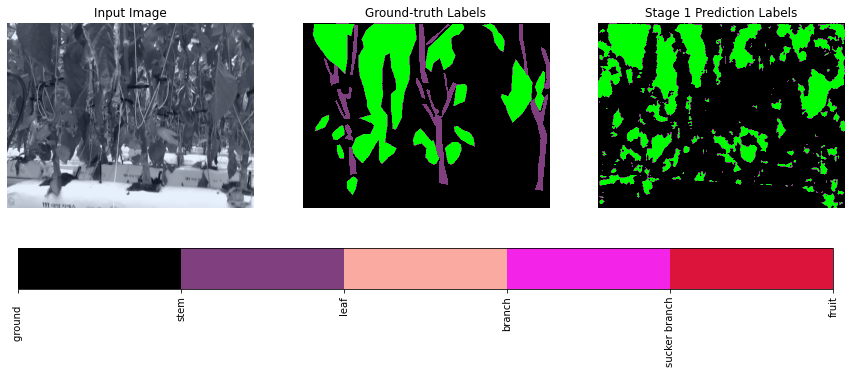

-----> saved best IOU at:  tensor(0.2118, device='cuda:0')
-----> saved best Loss at:  0.5630708097897726
best val iou tensor(0.2118, device='cuda:0')


Train Epoch: [1/30] Loss: 0.5157 mPA: 0.80%  Lr: 0.0007306307    IOU1: 0.2173 : 100%|██████████| 523/523 [01:39<00:00,  5.25it/s]
Train Epoch: [1/30] Loss: 0.5278 mPA: 0.80%      IOU1: 0.2228 : 100%|██████████| 58/58 [00:09<00:00,  5.83it/s]


idx: 140
Val Loss: 0.1377 FPS: 471.0 IOU: 0.2056


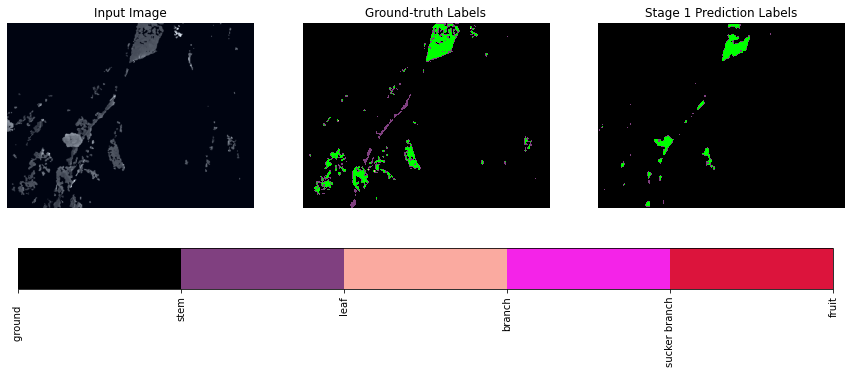

-----> saved best IOU at:  tensor(0.2228, device='cuda:0')
best val iou tensor(0.2228, device='cuda:0')


Train Epoch: [2/30] Loss: 0.4869 mPA: 0.81%  Lr: 0.0006245208    IOU1: 0.2258 : 100%|██████████| 523/523 [01:37<00:00,  5.34it/s]
Train Epoch: [2/30] Loss: 0.4997 mPA: 0.80%      IOU1: 0.2275 : 100%|██████████| 58/58 [00:11<00:00,  5.18it/s]


idx: 255
Val Loss: 0.6092 FPS: 606.4 IOU: 0.2064


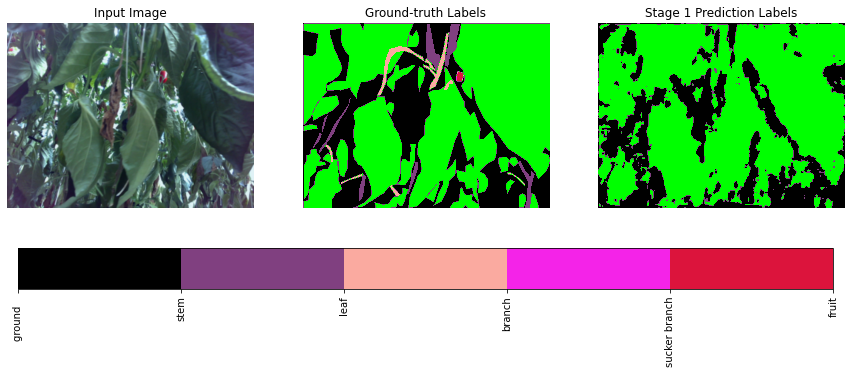

-----> saved best IOU at:  tensor(0.2275, device='cuda:0')
best val iou tensor(0.2275, device='cuda:0')


Train Epoch: [3/30] Loss: 0.4768 mPA: 0.81%  Lr: 0.0005338213    IOU1: 0.2309 : 100%|██████████| 523/523 [01:40<00:00,  5.23it/s]
Train Epoch: [3/30] Loss: 0.4935 mPA: 0.81%      IOU1: 0.2285 : 100%|██████████| 58/58 [00:11<00:00,  5.15it/s]


idx: 112
Val Loss: 0.7591 FPS: 579.2 IOU: 0.1713


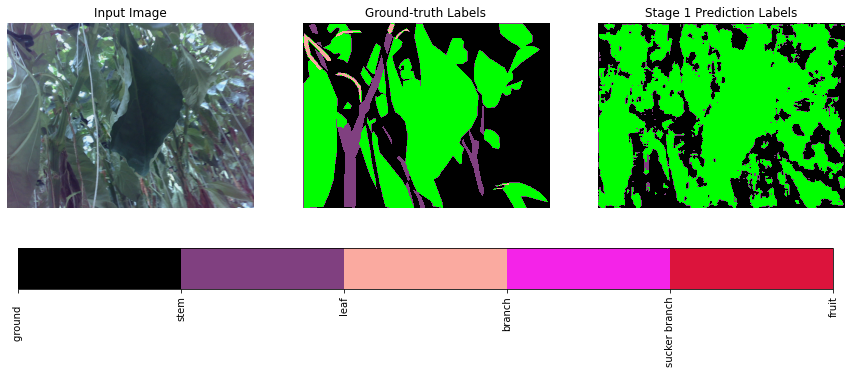

-----> saved best IOU at:  tensor(0.2285, device='cuda:0')
best val iou tensor(0.2285, device='cuda:0')


Train Epoch: [4/30] Loss: 0.4669 mPA: 0.82%  Lr: 0.0004562941    IOU1: 0.2351 : 100%|██████████| 523/523 [01:41<00:00,  5.17it/s]
Train Epoch: [4/30] Loss: 0.4832 mPA: 0.81%      IOU1: 0.2327 : 100%|██████████| 58/58 [00:09<00:00,  5.98it/s]


idx: 69
Val Loss: 0.5379 FPS: 587.8 IOU: 0.2301


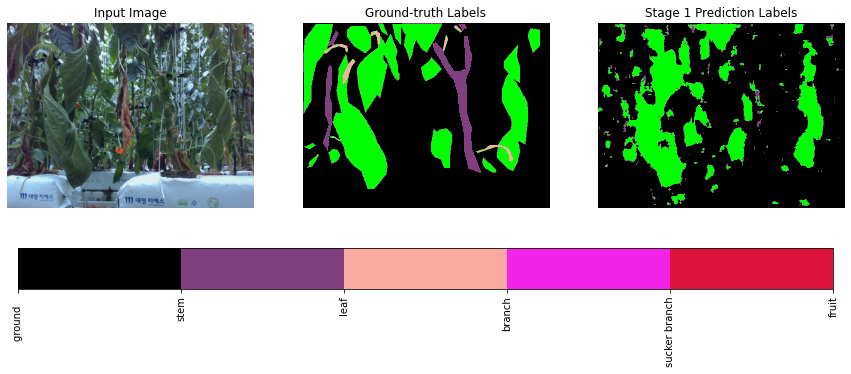

-----> saved best IOU at:  tensor(0.2327, device='cuda:0')
best val iou tensor(0.2327, device='cuda:0')


Train Epoch: [5/30] Loss: 0.4591 mPA: 0.82%  Lr: 0.0003900262    IOU1: 0.2387 : 100%|██████████| 523/523 [01:42<00:00,  5.12it/s]
Train Epoch: [5/30] Loss: 0.4797 mPA: 0.81%      IOU1: 0.2374 : 100%|██████████| 58/58 [00:11<00:00,  5.11it/s]


idx: 43
Val Loss: 0.5569 FPS: 348.2 IOU: 0.2482


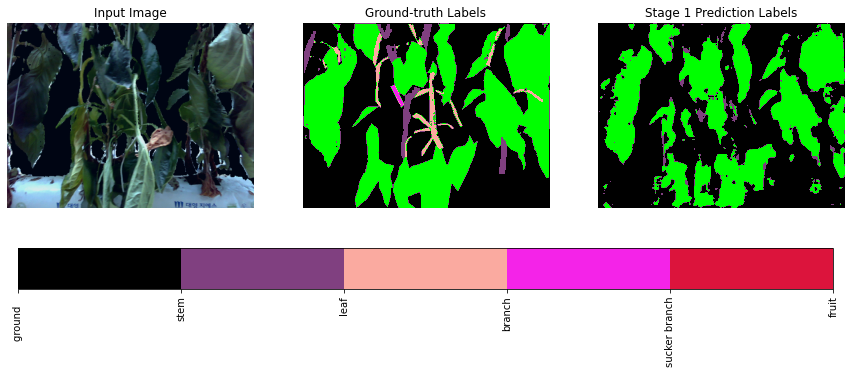

-----> saved best IOU at:  tensor(0.2374, device='cuda:0')
best val iou tensor(0.2374, device='cuda:0')


Train Epoch: [6/30] Loss: 0.4556 mPA: 0.82%  Lr: 0.0003333825    IOU1: 0.2410 : 100%|██████████| 523/523 [01:43<00:00,  5.06it/s]
Train Epoch: [6/30] Loss: 0.4747 mPA: 0.81%      IOU1: 0.2370 : 100%|██████████| 58/58 [00:11<00:00,  4.98it/s]


idx: 71
Val Loss: 0.0884 FPS: 565.8 IOU: 0.2383


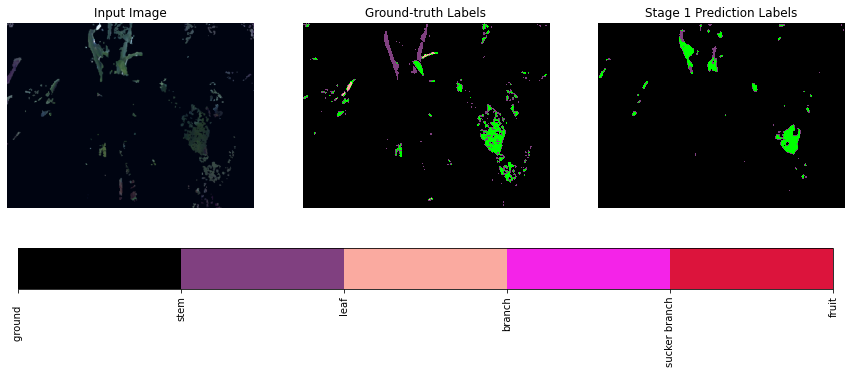

best val iou tensor(0.2374, device='cuda:0')


Train Epoch: [7/30] Loss: 0.4515 mPA: 0.82%  Lr: 0.0002849652    IOU1: 0.2427 : 100%|██████████| 523/523 [01:43<00:00,  5.03it/s]
Train Epoch: [7/30] Loss: 0.4714 mPA: 0.81%      IOU1: 0.2372 : 100%|██████████| 58/58 [00:11<00:00,  4.95it/s]


idx: 118
Val Loss: 0.7870 FPS: 597.3 IOU: 0.2006


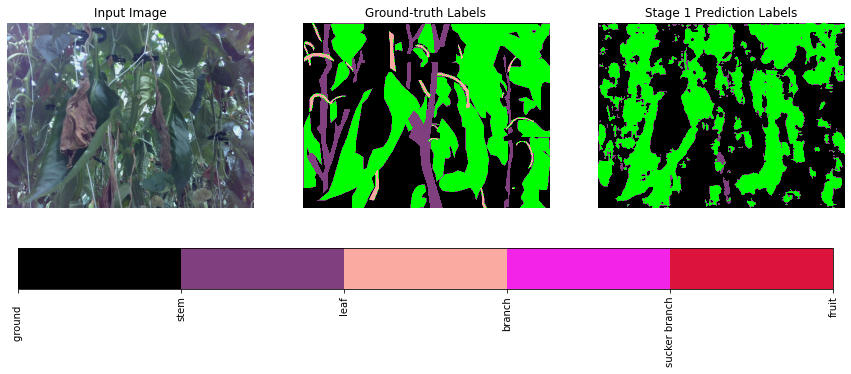

best val iou tensor(0.2374, device='cuda:0')


Train Epoch: [8/30] Loss: 0.4475 mPA: 0.82%  Lr: 0.0002435795    IOU1: 0.2443 : 100%|██████████| 523/523 [01:44<00:00,  4.98it/s]
Train Epoch: [8/30] Loss: 0.4681 mPA: 0.81%      IOU1: 0.2392 : 100%|██████████| 58/58 [00:11<00:00,  4.86it/s]


idx: 68
Val Loss: 0.9077 FPS: 347.2 IOU: 0.1786


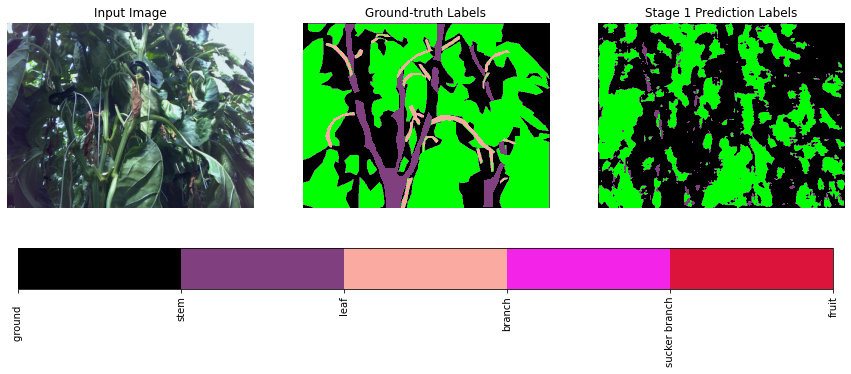

-----> saved best IOU at:  tensor(0.2392, device='cuda:0')
best val iou tensor(0.2392, device='cuda:0')


Train Epoch: [9/30] Loss: 0.4446 mPA: 0.82%  Lr: 0.0002082043    IOU1: 0.2460 : 100%|██████████| 523/523 [01:45<00:00,  4.96it/s]
Train Epoch: [9/30] Loss: 0.4643 mPA: 0.82%      IOU1: 0.2420 : 100%|██████████| 58/58 [00:11<00:00,  5.00it/s]


idx: 47
Val Loss: 0.6481 FPS: 446.5 IOU: 0.2005


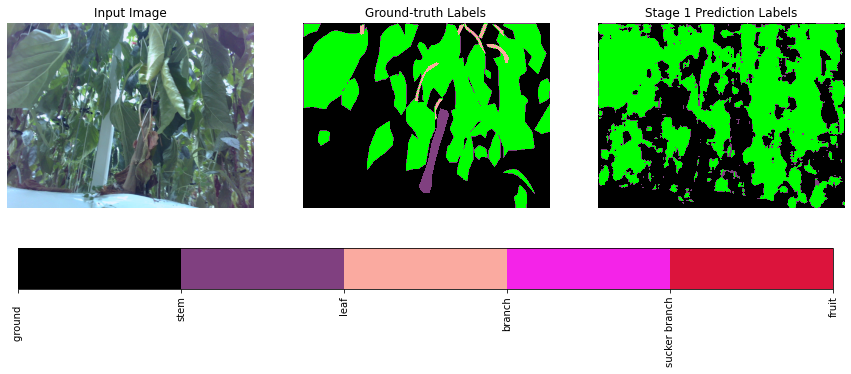

-----> saved best IOU at:  tensor(0.2420, device='cuda:0')
best val iou tensor(0.2420, device='cuda:0')


Train Epoch: [10/30] Loss: 0.4424 mPA: 0.83%  Lr: 0.0001779667    IOU1: 0.2471 : 100%|██████████| 523/523 [01:47<00:00,  4.88it/s]
Train Epoch: [10/30] Loss: 0.4653 mPA: 0.81%      IOU1: 0.2397 : 100%|██████████| 58/58 [00:11<00:00,  5.22it/s]


idx: 148
Val Loss: 0.0741 FPS: 430.6 IOU: 0.2432


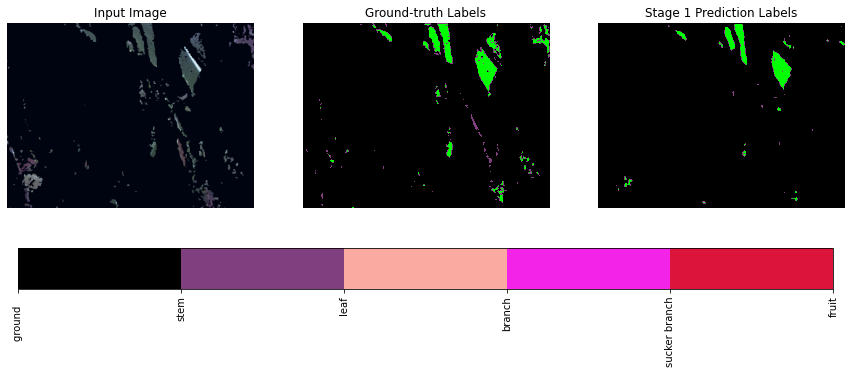

best val iou tensor(0.2420, device='cuda:0')


Train Epoch: [11/30] Loss: 0.4336 mPA: 0.83%  Lr: 0.0001641178    IOU1: 0.2492 :  52%|█████▏    | 270/523 [00:55<00:52,  4.84it/s]


KeyboardInterrupt: ignored

In [ ]:
trainer.train()

In [ ]:
import argparse
import os
import time

import pandas as pd
import torch
import torch.optim as optim
# from cityscapesscripts.helpers.labels import trainId2label
#from thop import profile, clever_format
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage
from tqdm import tqdm
from torchmetrics import JaccardIndex
import shutil
from torchvision import models
from torchsummary import summary

# train or val for one epoch

class Trainner():
  def __init__(self,net,input_path,batch_size,epoch,isdepth=False,num_class=8):
    self.n = 480
    self.isdepth = isdepth
    self.num_class = num_class
    self.n2 =640
    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    self.path = input_path
    self.weight_dir =  self.path +'/weights'
    self.batch_size =batch_size
    self.epoch = 0
    self.val_loss = 0
    self.val_iou = 0
    self.epochs = epoch
    self.lr = 0.001
    data_train,data_eval = load_data(path = input_path)
    self.image_datasets = {
        'train':
        SweetPepperDataSet( data_train, data_transforms['train'], isdepth ),
        'validation':
        SweetPepperDataSet( data_eval, data_transforms['validation'], isdepth )
    }
    #create dataloader to read batch_size of items for training
    #when training, images should be choose random, so shuffle = True
    self.dataloaders = {
        'train':
        torch.utils.data.DataLoader(self.image_datasets['train'],
                                    batch_size=batch_size,
                                    shuffle=True,
                                    num_workers=2),   # 1 if running on window
        'validation':
        torch.utils.data.DataLoader(self.image_datasets['validation'],
                                    batch_size=batch_size,
                                    shuffle=False,
                                    num_workers=2)  # 1 if running on window
    }
    self.train_loader = self.dataloaders['train']
    self.val_loader =  self.dataloaders['validation']
    self.model = model.to(self.device)
    self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr   )
    self.fiou = JaccardIndex(num_classes=self.num_class,task="multiclass").to(self.device)
    self.loss_criterion = nn.CrossEntropyLoss(ignore_index=255)

  def train(self):
    start = self.epoch
    for self.epoch in range(start, self.epochs + 1):
        self.train_val()
        self.eval()


  def train_val(self):
    self.model.train()
    total_correct = 0
    total_iou,total_loss,  total_num, data_bar = 0.0,0.0,0.0,  tqdm(self.train_loader)
    torch.enable_grad() #if is_train else torch.no_grad()):
    num = 0
    for data, target, depth in data_bar:
            # print('b6')
            # self.cur_iters = self.cur_iters + 1
            num += 1
            data, target,depth = data.to(self.device), target.to(self.device), depth.to(self.device)
            if data.size()[0] == 1:
              continue
            if(self.device == 'cuda'):
              torch.cuda.synchronize()
            if self.isdepth == False:
                out = self.model(data)
            else:
                out = self.model(data,depth)
            # out =out['out']
            prediction = torch.argmax(out, dim=1)
            if(self.device == 'cuda'):
              torch.cuda.synchronize()
            loss = self.loss_criterion(out, target)
            iou_s1 = self.fiou(out.data.to(self.device), target.data.to(self.device))
            total_loss += (loss.item() ) * data.size(0)
            total_iou += iou_s1
            total_num += data.size(0)
            self.lr = self.lr*0.99991
            for param_group in self.optimizer.param_groups:
                param_group['lr'] = self.lr
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            total_correct += torch.sum(prediction == target).item() / target.numel() * data.size(0)
            data_bar.set_description('{} Epoch: [{}/{}] Loss: {:.4f} mPA: {:.2f}%  Lr: {:.10f}    IOU1: {:.4f} '
                                     .format('Train' , self.epoch, self.epochs, total_loss / total_num, total_correct/total_num,self.lr,total_iou/num))

    return total_loss / total_num, total_iou/num

  def eval(self):
    self.model.eval()
    torch.no_grad()
    total_iou,total_loss, total_correct, total_time, total_num, data_bar = 0.0,0.0, 0.0, 0.0, 0, tqdm(self.val_loader)
    num = 0
    for data, target, depth in data_bar:
            num += 1
            data, target,depth = data.to(self.device), target.to(self.device), depth.to(self.device)
            if(self.device == 'cuda'):
              torch.cuda.synchronize()
            if self.isdepth == False: #kiem tra anh depth co ko
                out = self.model(data)
            else:
                out = self.model(data,depth)
            # out =out['out']
            prediction = torch.argmax(out, dim=1)
            if(self.device == 'cuda'):
              torch.cuda.synchronize()
            loss = self.loss_criterion(out, target)
            iou_s1 = self.fiou(out.data.to(self.device), target.data.to(self.device))
            total_loss += (loss.item() ) * data.size(0)
            total_iou += iou_s1
            total_num += data.size(0)
            total_correct += torch.sum(prediction == target).item() / target.numel() * data.size(0)
            data_bar.set_description('{} Epoch: [{}/{}] Loss: {:.4f} mPA: {:.2f}%      IOU1: {:.4f} '
                                     .format('Train' , self.epoch, self.epochs, total_loss / total_num, total_correct/total_num,total_iou/num))
    self.random_val_predict()
    if self.val_iou < total_iou/num:
        self.val_iou = total_iou/num
        filename = '2way_nocut_2_best_iou.pth'
        save_path = os.path.join(self.weight_dir, filename)
        torch.save(model.state_dict(), save_path)
        print('-----> saved best IOU at: ' ,  self.val_iou)
    if self.val_loss <total_loss / total_num:
        self.val_loss = total_loss / total_num
        filename = '2way_nocut_2_best_lost.pth'
        save_path = os.path.join(self.weight_dir, filename)
        torch.save(model.state_dict(), save_path)
        print('-----> saved best Loss at: ' , self.val_loss)

    print('best val iou',self.val_iou)


  def show_all_predict(self):
    self.maxfps = 0
    total = 0
    n = len(self.image_datasets['validation'])
    for i in range (0, n):
      total += self.random_val_predict(idx = i)
    print('max fps:', self.maxfps)
    print('avg fps:', total/n)


  def random_val_predict(self,info = True,idx = 0):
     if (idx ==0):
        idx = random.randint(0, len(self.image_datasets['validation'])-1)
     print('idx:',idx)
     rgb,mask,depth= self.image_datasets['validation'][idx]
     image =rgb.unsqueeze(0).to( self.device)
     fps = 0
     mask = mask.unsqueeze(0).to( self.device)
     depth = depth.unsqueeze(0).to( self.device)
    #  print(image.shape)
    #  print(mask.shape)
    #  print(depth.shape)
     self.model.eval()
     with torch.no_grad():
          if info == True:
                start_time = time.time()
          if self.isdepth == False:
                outputs = self.model(image)
          else:
                # depth = depth.unsqueeze(0).to( self.device)
                outputs = self.model(image,depth)
          # outputs =outputs['out']
          if info == True:
                stop_time = time.time()
                fps= 1/(stop_time - start_time)
                loss = self.loss_criterion(outputs, mask)
                iou_s = self.fiou(outputs, mask)
                print('{} Loss: {:.4f} FPS: {:.1f} IOU: {:.4f}'.format('Val',  loss.item(),fps,iou_s))

          pred = torch.argmax(outputs, 1)
          label = mask
          pred = pred.squeeze(0).cpu().data.numpy()
          label = mask.cpu().numpy()
          label = label.transpose(1, 2, 0)
          label = label.reshape( self.n, self.n2,1)
          img = image.squeeze(0)
          img = img.cpu().numpy()
          img = img.transpose(1, 2, 0)
          if img.shape[2] > 3:
            img = img[:,:,0:3]
          r,g,b = cv2.split(img)
          img_bgr = cv2.merge([b,g,r])
          #im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          display([img[:,:,0:3], label, pred.reshape( self.n, self.n2,1)])
     return img,pred


In [ ]:
filename = '/content/drive/MyDrive/deeplabv3/augment/weights/1way_nocut_1_best_iou.pth' #remember change the path
save_path = os.path.join(input_path, filename)
if os.path.isfile(save_path):
    name, ext = os.path.splitext(save_path)
    assert ext == '.pkl' or '.pth', 'Sorry only .pth and .pkl files supported.'
    print('Resuming training, loading {}...'.format(save_path))
    print(model.load_state_dict(torch.load(save_path, map_location=lambda storage, loc: storage))   )

Resuming training, loading /content/drive/MyDrive/deeplabv3/augment/weights/1way_nocut_1_best_iou.pth...


NameError: ignored

In [ ]:
trainer = Trainner(model,input_path,batch_size,max_epochs,isdepth=True,num_class = numclass)

3488
3488


In [ ]:
trainer.random_val_predict()

In [ ]:
trainer.train()

Train Epoch: [0/30] Loss: 0.1965 mPA: 0.92%  Lr: 0.0009539327    IOU1: 0.4353 : 100%|██████████| 524/524 [33:20<00:00,  3.82s/it]
Train Epoch: [0/30] Loss: 0.2950 mPA: 0.89%      IOU1: 0.3805 : 100%|██████████| 58/58 [03:22<00:00,  3.49s/it]


idx: 276
Val Loss: 0.2575 FPS: 64.3 IOU: 0.3654


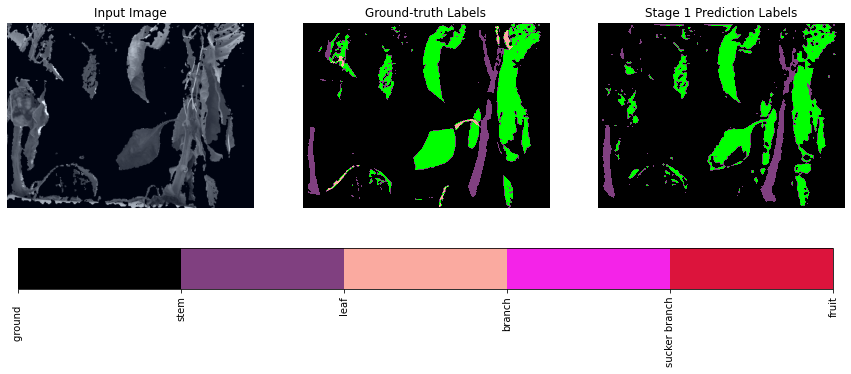

-----> saved best IOU at:  tensor(0.3805, device='cuda:0')
-----> saved best Loss at:  0.29499300543604223
best val iou tensor(0.3805, device='cuda:0')


Train Epoch: [1/30] Loss: 0.1901 mPA: 0.93%  Lr: 0.0009099877    IOU1: 0.4426 : 100%|██████████| 524/524 [03:33<00:00,  2.45it/s]
Train Epoch: [1/30] Loss: 0.2037 mPA: 0.92%      IOU1: 0.4309 : 100%|██████████| 58/58 [00:12<00:00,  4.75it/s]


idx: 326
Val Loss: 0.0486 FPS: 101.5 IOU: 0.2997


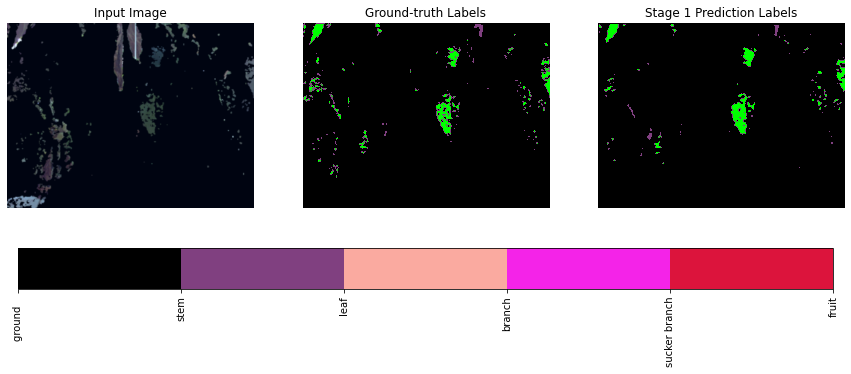

-----> saved best IOU at:  tensor(0.4309, device='cuda:0')
best val iou tensor(0.4309, device='cuda:0')


Train Epoch: [2/30] Loss: 0.1724 mPA: 0.93%  Lr: 0.0008680670    IOU1: 0.4572 : 100%|██████████| 524/524 [03:33<00:00,  2.45it/s]
Train Epoch: [2/30] Loss: 0.1954 mPA: 0.92%      IOU1: 0.4450 : 100%|██████████| 58/58 [00:12<00:00,  4.69it/s]


idx: 155
Val Loss: 0.0929 FPS: 95.2 IOU: 0.4133


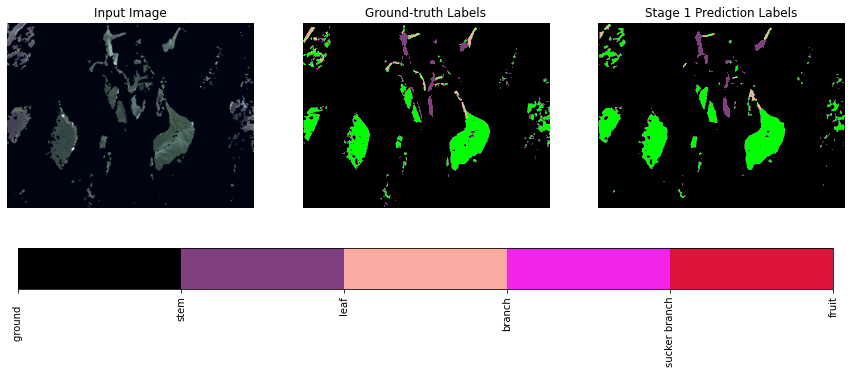

-----> saved best IOU at:  tensor(0.4450, device='cuda:0')
best val iou tensor(0.4450, device='cuda:0')


Train Epoch: [3/30] Loss: 0.1758 mPA: 0.93%  Lr: 0.0008280775    IOU1: 0.4569 : 100%|██████████| 524/524 [03:34<00:00,  2.45it/s]
Train Epoch: [3/30] Loss: 0.1857 mPA: 0.93%      IOU1: 0.4575 : 100%|██████████| 58/58 [00:12<00:00,  4.69it/s]


idx: 139
Val Loss: 0.3181 FPS: 101.8 IOU: 0.4145


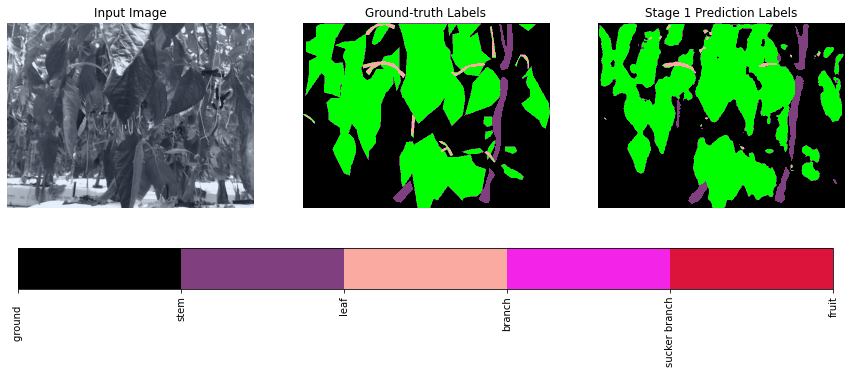

-----> saved best IOU at:  tensor(0.4575, device='cuda:0')
best val iou tensor(0.4575, device='cuda:0')


Train Epoch: [4/30] Loss: 0.1551 mPA: 0.94%  Lr: 0.0007899303    IOU1: 0.4745 : 100%|██████████| 524/524 [03:34<00:00,  2.44it/s]
Train Epoch: [4/30] Loss: 0.1863 mPA: 0.93%      IOU1: 0.4534 : 100%|██████████| 58/58 [00:12<00:00,  4.63it/s]


idx: 106
Val Loss: 0.4379 FPS: 102.2 IOU: 0.3508


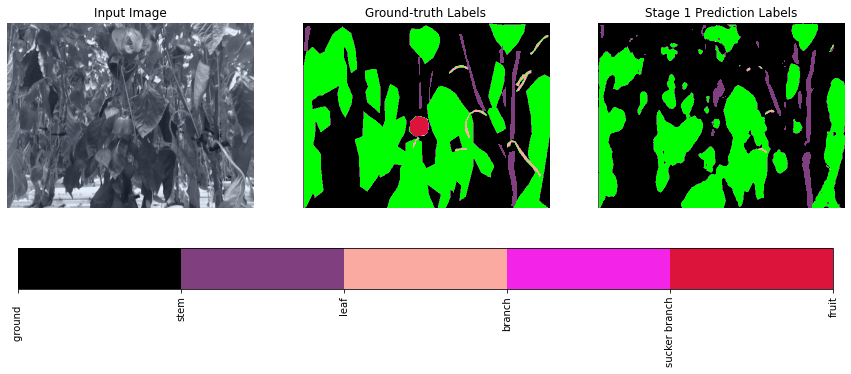

best val iou tensor(0.4575, device='cuda:0')


Train Epoch: [5/30] Loss: 0.1461 mPA: 0.94%  Lr: 0.0007535403    IOU1: 0.4831 : 100%|██████████| 524/524 [03:35<00:00,  2.43it/s]
Train Epoch: [5/30] Loss: 0.1871 mPA: 0.93%      IOU1: 0.4605 : 100%|██████████| 58/58 [00:11<00:00,  5.02it/s]


idx: 289
Val Loss: 0.0980 FPS: 74.9 IOU: 0.4489


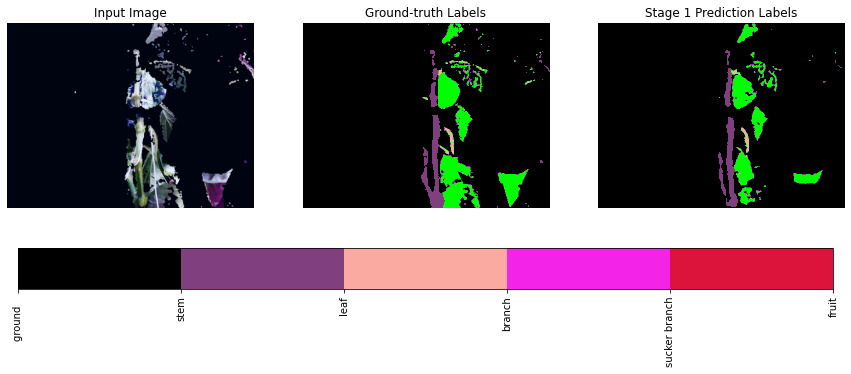

-----> saved best IOU at:  tensor(0.4605, device='cuda:0')
best val iou tensor(0.4605, device='cuda:0')


Train Epoch: [6/30] Loss: 0.1419 mPA: 0.94%  Lr: 0.0007188268    IOU1: 0.4880 : 100%|██████████| 524/524 [03:36<00:00,  2.43it/s]
Train Epoch: [6/30] Loss: 0.1714 mPA: 0.93%      IOU1: 0.4723 : 100%|██████████| 58/58 [00:11<00:00,  4.97it/s]


idx: 88
Val Loss: 0.0461 FPS: 97.9 IOU: 0.3125


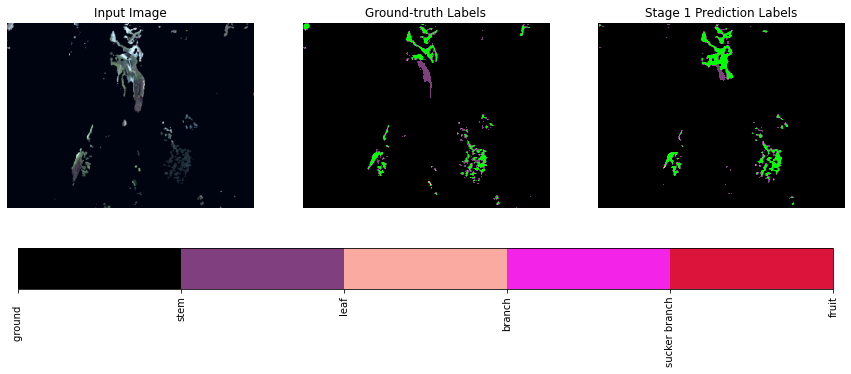

-----> saved best IOU at:  tensor(0.4723, device='cuda:0')
best val iou tensor(0.4723, device='cuda:0')


Train Epoch: [7/30] Loss: 0.1369 mPA: 0.95%  Lr: 0.0006857124    IOU1: 0.4928 : 100%|██████████| 524/524 [03:36<00:00,  2.42it/s]
Train Epoch: [7/30] Loss: 0.1656 mPA: 0.94%      IOU1: 0.4729 : 100%|██████████| 58/58 [00:12<00:00,  4.81it/s]


idx: 312
Val Loss: 0.0768 FPS: 103.9 IOU: 0.4285


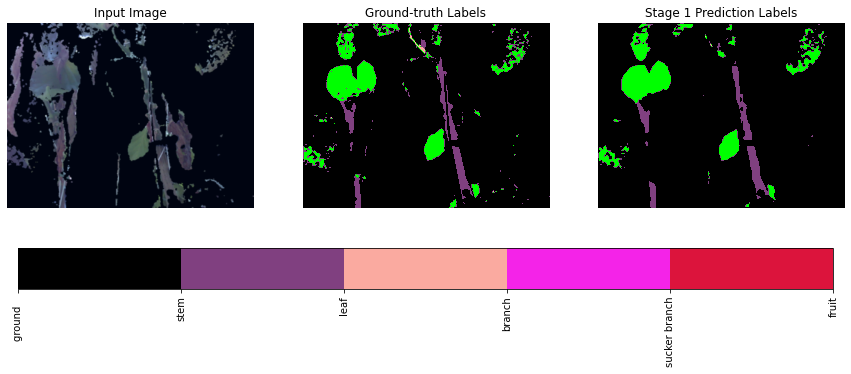

-----> saved best IOU at:  tensor(0.4729, device='cuda:0')
best val iou tensor(0.4729, device='cuda:0')


Train Epoch: [8/30] Loss: 0.1276 mPA: 0.95%  Lr: 0.0006541235    IOU1: 0.5018 : 100%|██████████| 524/524 [03:36<00:00,  2.42it/s]
Train Epoch: [8/30] Loss: 0.1671 mPA: 0.94%      IOU1: 0.4771 : 100%|██████████| 58/58 [00:12<00:00,  4.58it/s]


idx: 65
Val Loss: 0.1213 FPS: 95.7 IOU: 0.5411


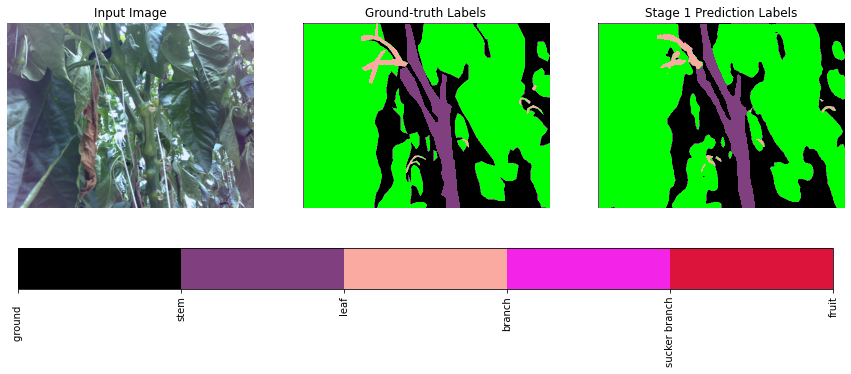

-----> saved best IOU at:  tensor(0.4771, device='cuda:0')
best val iou tensor(0.4771, device='cuda:0')


Train Epoch: [9/30] Loss: 0.1236 mPA: 0.95%  Lr: 0.0006239898    IOU1: 0.5064 : 100%|██████████| 524/524 [03:36<00:00,  2.42it/s]
Train Epoch: [9/30] Loss: 0.1618 mPA: 0.94%      IOU1: 0.4848 : 100%|██████████| 58/58 [00:13<00:00,  4.42it/s]


idx: 133
Val Loss: 0.1010 FPS: 98.7 IOU: 0.4795


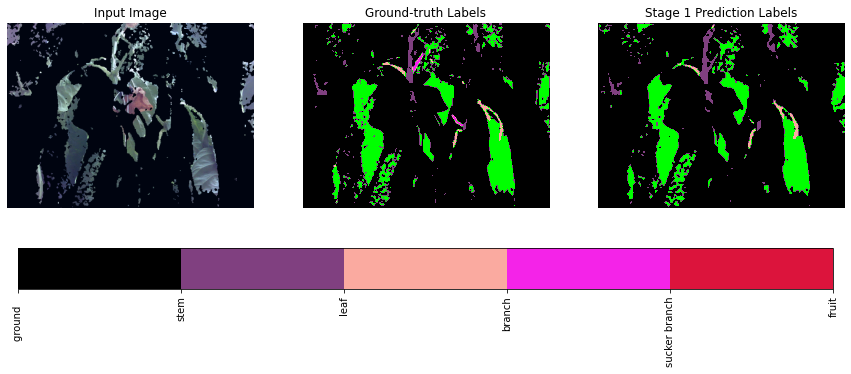

-----> saved best IOU at:  tensor(0.4848, device='cuda:0')
best val iou tensor(0.4848, device='cuda:0')


Train Epoch: [10/30] Loss: 0.1196 mPA: 0.95%  Lr: 0.0005952443    IOU1: 0.5119 : 100%|██████████| 524/524 [03:36<00:00,  2.42it/s]
Train Epoch: [10/30] Loss: 0.1848 mPA: 0.93%      IOU1: 0.4697 : 100%|██████████| 58/58 [00:12<00:00,  4.49it/s]


idx: 340
Val Loss: 0.1667 FPS: 104.2 IOU: 0.4728


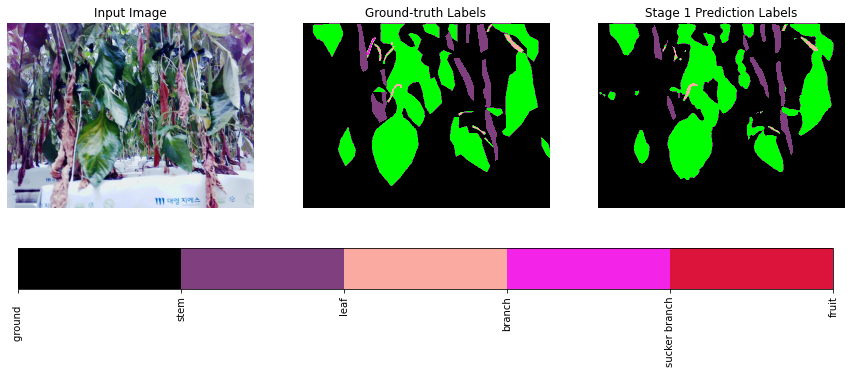

best val iou tensor(0.4848, device='cuda:0')


Train Epoch: [11/30] Loss: 0.1177 mPA: 0.95%  Lr: 0.0005678230    IOU1: 0.5153 : 100%|██████████| 524/524 [03:37<00:00,  2.41it/s]
Train Epoch: [11/30] Loss: 0.1706 mPA: 0.94%      IOU1: 0.4854 : 100%|██████████| 58/58 [00:12<00:00,  4.47it/s]


idx: 333
Val Loss: 0.2001 FPS: 58.9 IOU: 0.5281


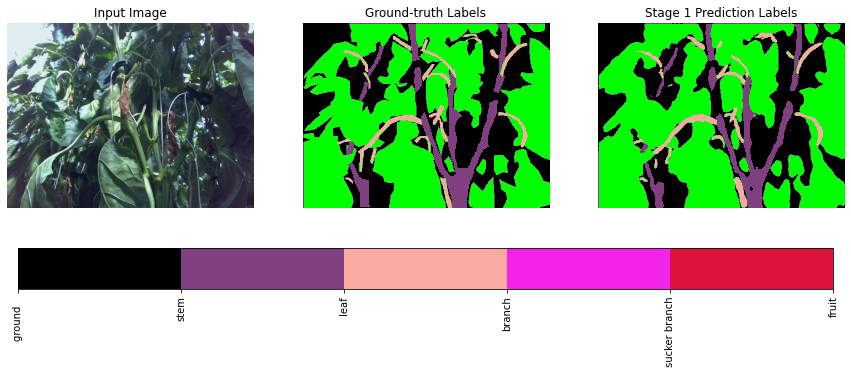

-----> saved best IOU at:  tensor(0.4854, device='cuda:0')
best val iou tensor(0.4854, device='cuda:0')


Train Epoch: [12/30] Loss: 0.1125 mPA: 0.95%  Lr: 0.0005416650    IOU1: 0.5204 : 100%|██████████| 524/524 [03:37<00:00,  2.40it/s]
Train Epoch: [12/30] Loss: 0.1544 mPA: 0.94%      IOU1: 0.4945 : 100%|██████████| 58/58 [00:11<00:00,  4.86it/s]


idx: 134
Val Loss: 0.5904 FPS: 76.0 IOU: 0.3442


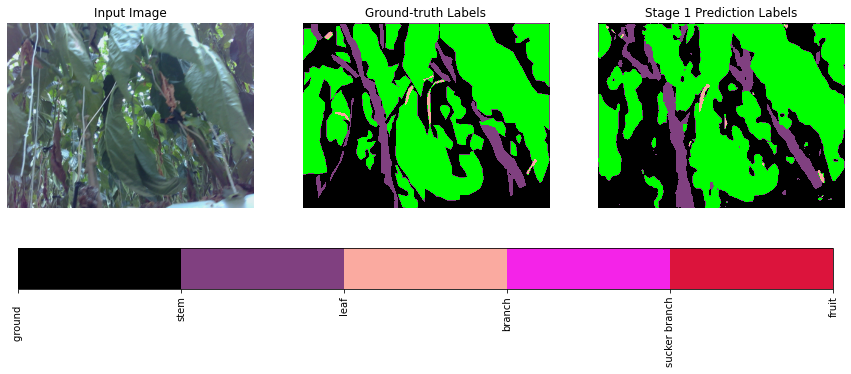

-----> saved best IOU at:  tensor(0.4945, device='cuda:0')
best val iou tensor(0.4945, device='cuda:0')


Train Epoch: [13/30] Loss: 0.1090 mPA: 0.96%  Lr: 0.0005167120    IOU1: 0.5237 : 100%|██████████| 524/524 [03:37<00:00,  2.41it/s]
Train Epoch: [13/30] Loss: 0.1630 mPA: 0.94%      IOU1: 0.4940 : 100%|██████████| 58/58 [00:13<00:00,  4.41it/s]


idx: 90
Val Loss: 0.1548 FPS: 94.7 IOU: 0.3353


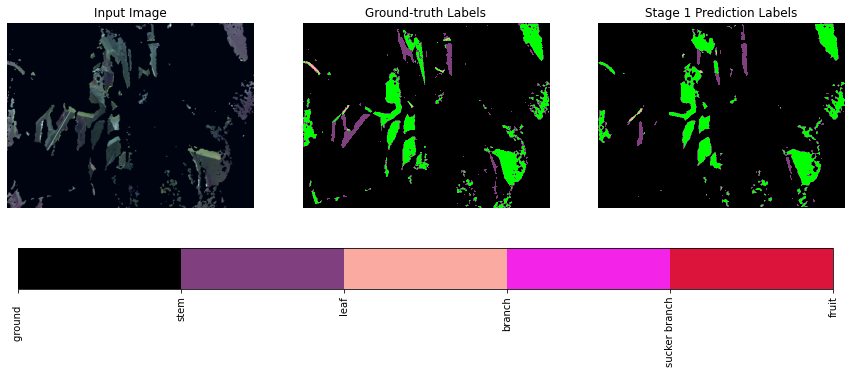

best val iou tensor(0.4945, device='cuda:0')


Train Epoch: [14/30] Loss: 0.1113 mPA: 0.96%  Lr: 0.0004929084    IOU1: 0.5233 : 100%|██████████| 524/524 [03:37<00:00,  2.40it/s]
Train Epoch: [14/30] Loss: 0.1513 mPA: 0.94%      IOU1: 0.5008 : 100%|██████████| 58/58 [00:13<00:00,  4.28it/s]


idx: 36
Val Loss: 0.2347 FPS: 98.4 IOU: 0.4955


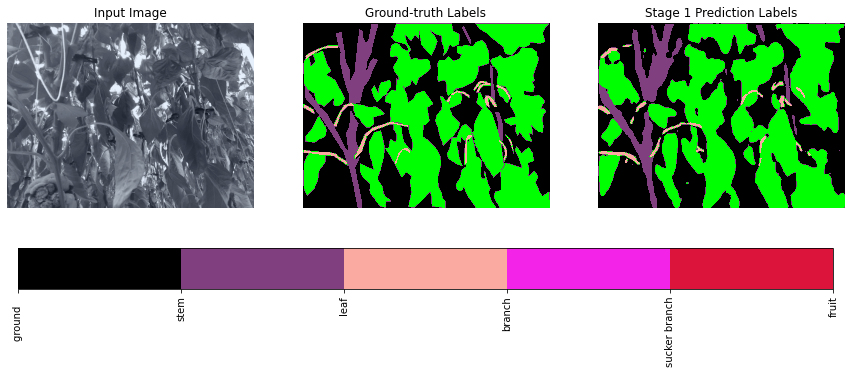

-----> saved best IOU at:  tensor(0.5008, device='cuda:0')
best val iou tensor(0.5008, device='cuda:0')


Train Epoch: [15/30] Loss: 0.1029 mPA: 0.96%  Lr: 0.0004702015    IOU1: 0.5311 : 100%|██████████| 524/524 [03:38<00:00,  2.40it/s]
Train Epoch: [15/30] Loss: 0.1613 mPA: 0.94%      IOU1: 0.5012 : 100%|██████████| 58/58 [00:12<00:00,  4.56it/s]


idx: 49
Val Loss: 0.8221 FPS: 63.3 IOU: 0.3285


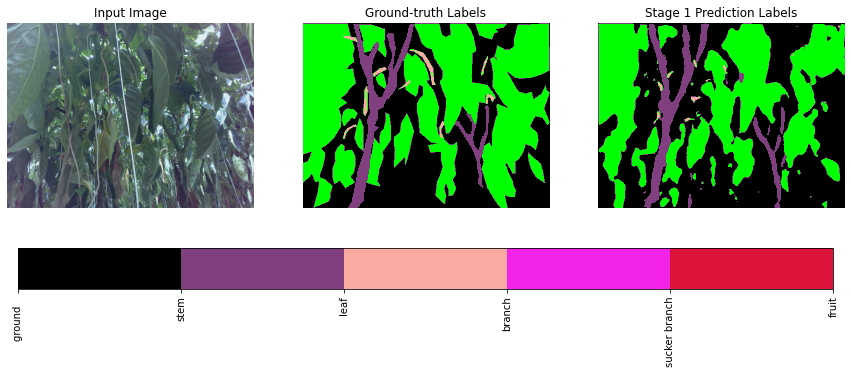

-----> saved best IOU at:  tensor(0.5012, device='cuda:0')
best val iou tensor(0.5012, device='cuda:0')


Train Epoch: [16/30] Loss: 0.1002 mPA: 0.96%  Lr: 0.0004485406    IOU1: 0.5344 : 100%|██████████| 524/524 [03:38<00:00,  2.40it/s]
Train Epoch: [16/30] Loss: 0.1482 mPA: 0.94%      IOU1: 0.4973 : 100%|██████████| 58/58 [00:12<00:00,  4.50it/s]


idx: 90
Val Loss: 0.1716 FPS: 102.0 IOU: 0.3287


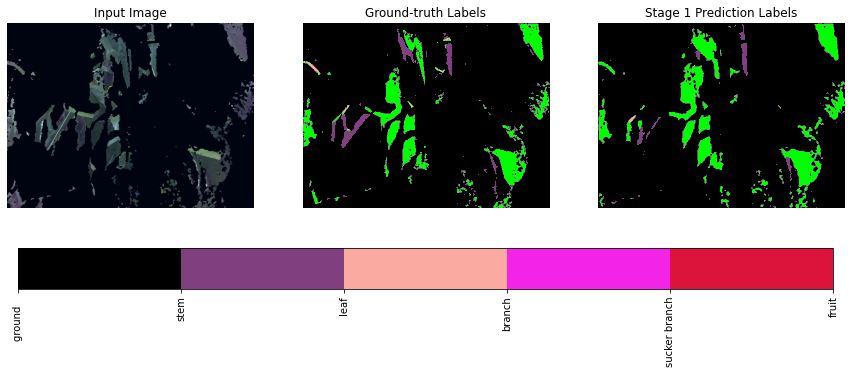

best val iou tensor(0.5012, device='cuda:0')


Train Epoch: [17/30] Loss: 0.0982 mPA: 0.96%  Lr: 0.0004278776    IOU1: 0.5368 : 100%|██████████| 524/524 [03:38<00:00,  2.39it/s]
Train Epoch: [17/30] Loss: 0.1498 mPA: 0.95%      IOU1: 0.5021 : 100%|██████████| 58/58 [00:13<00:00,  4.29it/s]


idx: 261
Val Loss: 0.1556 FPS: 99.1 IOU: 0.5018


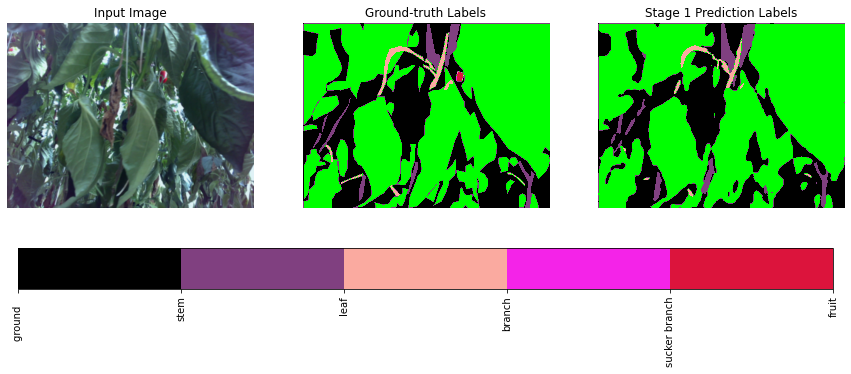

-----> saved best IOU at:  tensor(0.5021, device='cuda:0')
best val iou tensor(0.5021, device='cuda:0')


Train Epoch: [18/30] Loss: 0.0966 mPA: 0.96%  Lr: 0.0004081664    IOU1: 0.5384 : 100%|██████████| 524/524 [03:38<00:00,  2.39it/s]
Train Epoch: [18/30] Loss: 0.1484 mPA: 0.95%      IOU1: 0.5062 : 100%|██████████| 58/58 [00:13<00:00,  4.25it/s]


idx: 237
Val Loss: 0.1645 FPS: 89.6 IOU: 0.4517


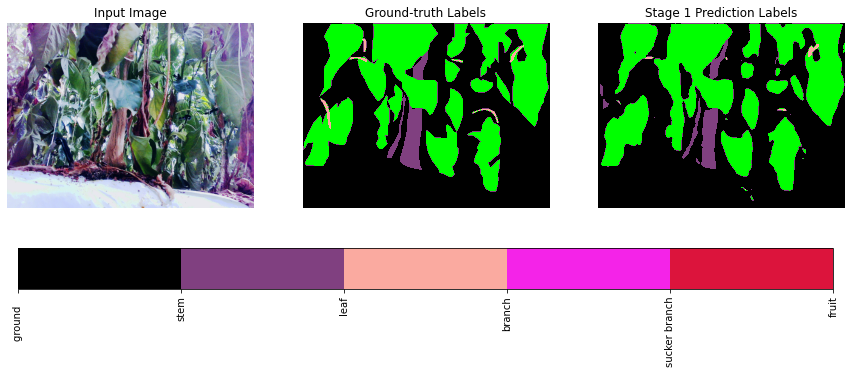

-----> saved best IOU at:  tensor(0.5062, device='cuda:0')
best val iou tensor(0.5062, device='cuda:0')


Train Epoch: [19/30] Loss: 0.0944 mPA: 0.96%  Lr: 0.0003893633    IOU1: 0.5414 : 100%|██████████| 524/524 [03:39<00:00,  2.38it/s]
Train Epoch: [19/30] Loss: 0.1568 mPA: 0.95%      IOU1: 0.5083 : 100%|██████████| 58/58 [00:13<00:00,  4.36it/s]


idx: 6
Val Loss: 0.0730 FPS: 62.3 IOU: 0.5074


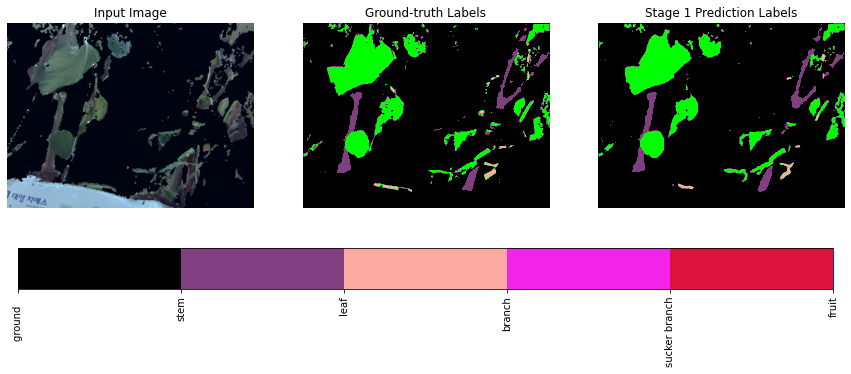

-----> saved best IOU at:  tensor(0.5083, device='cuda:0')
best val iou tensor(0.5083, device='cuda:0')


Train Epoch: [20/30] Loss: 0.0922 mPA: 0.96%  Lr: 0.0003714264    IOU1: 0.5450 : 100%|██████████| 524/524 [03:38<00:00,  2.39it/s]
Train Epoch: [20/30] Loss: 0.1448 mPA: 0.95%      IOU1: 0.5178 : 100%|██████████| 58/58 [00:14<00:00,  4.12it/s]


idx: 311
Val Loss: 0.1415 FPS: 100.8 IOU: 0.5140


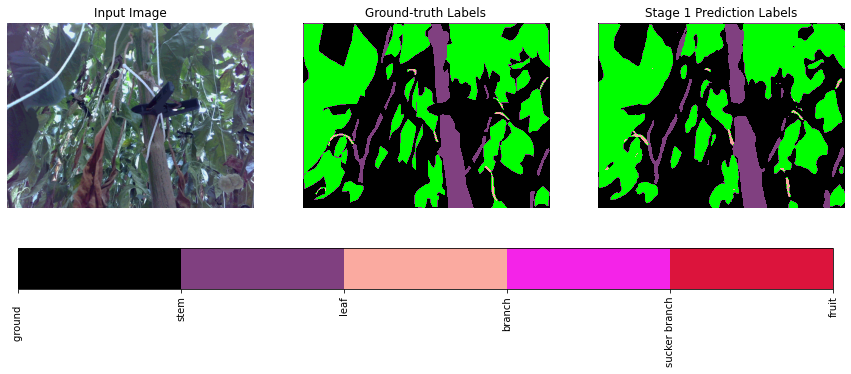

-----> saved best IOU at:  tensor(0.5178, device='cuda:0')
best val iou tensor(0.5178, device='cuda:0')


Train Epoch: [21/30] Loss: 0.0907 mPA: 0.96%  Lr: 0.0003543158    IOU1: 0.5487 : 100%|██████████| 524/524 [03:39<00:00,  2.39it/s]
Train Epoch: [21/30] Loss: 0.1561 mPA: 0.94%      IOU1: 0.5113 : 100%|██████████| 58/58 [00:13<00:00,  4.19it/s]


idx: 158
Val Loss: 0.0550 FPS: 74.0 IOU: 0.5189


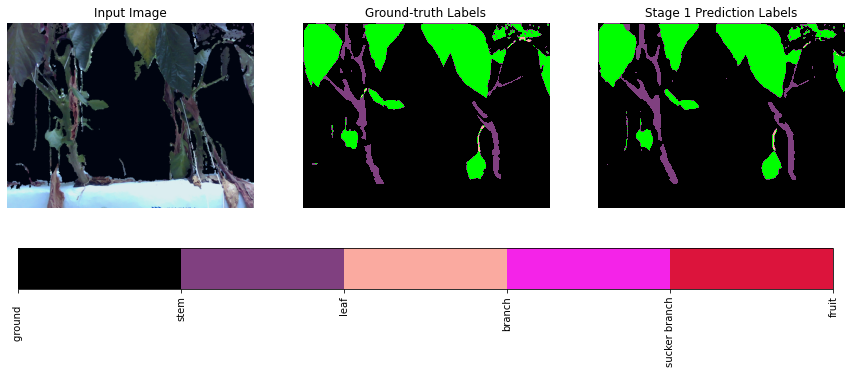

best val iou tensor(0.5178, device='cuda:0')


Train Epoch: [22/30] Loss: 0.0889 mPA: 0.96%  Lr: 0.0003379934    IOU1: 0.5550 : 100%|██████████| 524/524 [03:39<00:00,  2.39it/s]
Train Epoch: [22/30] Loss: 0.1460 mPA: 0.95%      IOU1: 0.5131 : 100%|██████████| 58/58 [00:14<00:00,  4.08it/s]


idx: 195
Val Loss: 0.0615 FPS: 94.6 IOU: 0.4458


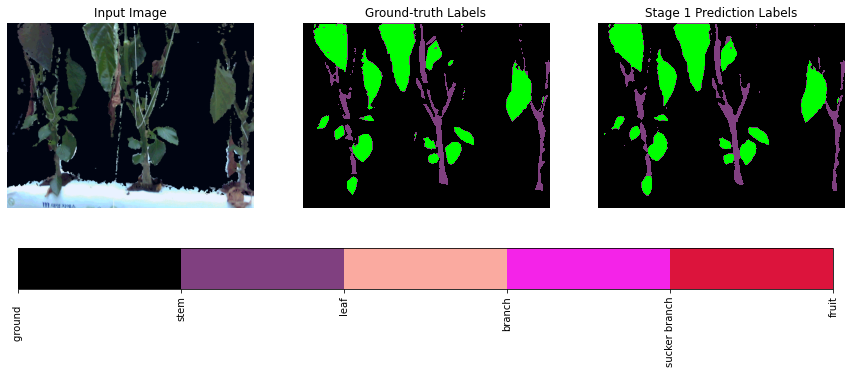

best val iou tensor(0.5178, device='cuda:0')


Train Epoch: [23/30] Loss: 0.0872 mPA: 0.96%  Lr: 0.0003224230    IOU1: 0.5571 : 100%|██████████| 524/524 [03:40<00:00,  2.38it/s]
Train Epoch: [23/30] Loss: 0.1462 mPA: 0.95%      IOU1: 0.5249 : 100%|██████████| 58/58 [00:14<00:00,  3.99it/s]


idx: 34
Val Loss: 0.0507 FPS: 80.3 IOU: 0.5357


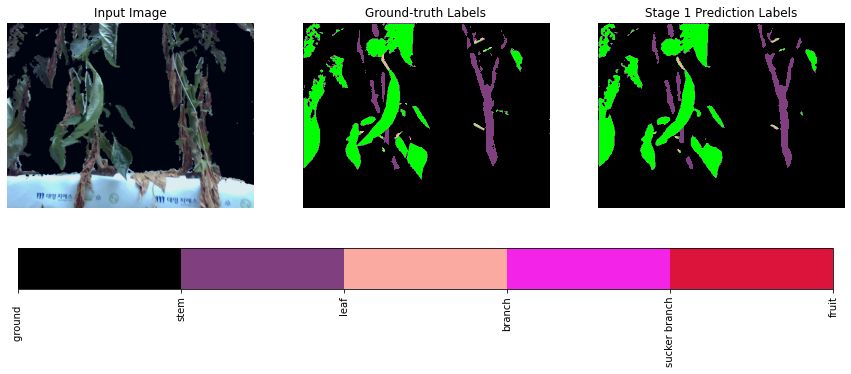

-----> saved best IOU at:  tensor(0.5249, device='cuda:0')
best val iou tensor(0.5249, device='cuda:0')


Train Epoch: [24/30] Loss: 0.0873 mPA: 0.96%  Lr: 0.0003075699    IOU1: 0.5608 : 100%|██████████| 524/524 [03:40<00:00,  2.38it/s]
Train Epoch: [24/30] Loss: 0.1496 mPA: 0.95%      IOU1: 0.5317 : 100%|██████████| 58/58 [00:14<00:00,  4.08it/s]


idx: 343
Val Loss: 0.0406 FPS: 100.2 IOU: 0.5449


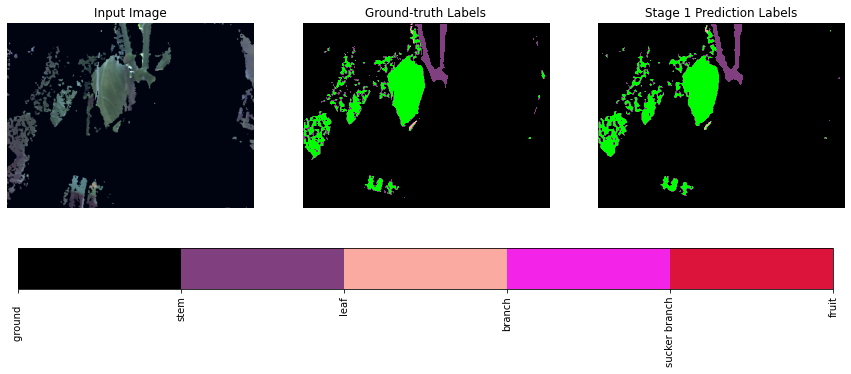

-----> saved best IOU at:  tensor(0.5317, device='cuda:0')
best val iou tensor(0.5317, device='cuda:0')


Train Epoch: [25/30] Loss: 0.0842 mPA: 0.97%  Lr: 0.0002934009    IOU1: 0.5656 : 100%|██████████| 524/524 [03:40<00:00,  2.37it/s]
Train Epoch: [25/30] Loss: 0.1647 mPA: 0.95%      IOU1: 0.5161 : 100%|██████████| 58/58 [00:14<00:00,  4.02it/s]


idx: 43
Val Loss: 0.3172 FPS: 77.6 IOU: 0.4825


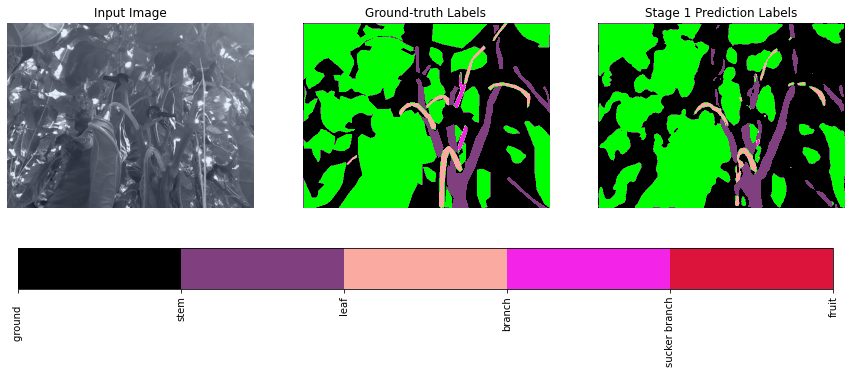

best val iou tensor(0.5317, device='cuda:0')


Train Epoch: [26/30] Loss: 0.0871 mPA: 0.96%  Lr: 0.0002798848    IOU1: 0.5654 : 100%|██████████| 524/524 [03:39<00:00,  2.39it/s]
Train Epoch: [26/30] Loss: 0.1541 mPA: 0.95%      IOU1: 0.5203 : 100%|██████████| 58/58 [00:14<00:00,  4.14it/s]


idx: 266
Val Loss: 0.0598 FPS: 100.4 IOU: 0.5321


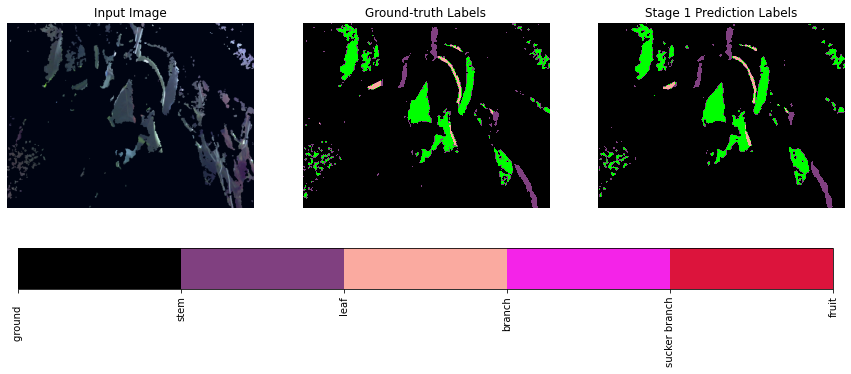

best val iou tensor(0.5317, device='cuda:0')


Train Epoch: [27/30] Loss: 0.0835 mPA: 0.97%  Lr: 0.0002669912    IOU1: 0.5710 : 100%|██████████| 524/524 [03:40<00:00,  2.38it/s]
Train Epoch: [27/30] Loss: 0.1453 mPA: 0.95%      IOU1: 0.5394 : 100%|██████████| 58/58 [00:14<00:00,  4.01it/s]


idx: 305
Val Loss: 0.1578 FPS: 95.8 IOU: 0.3783


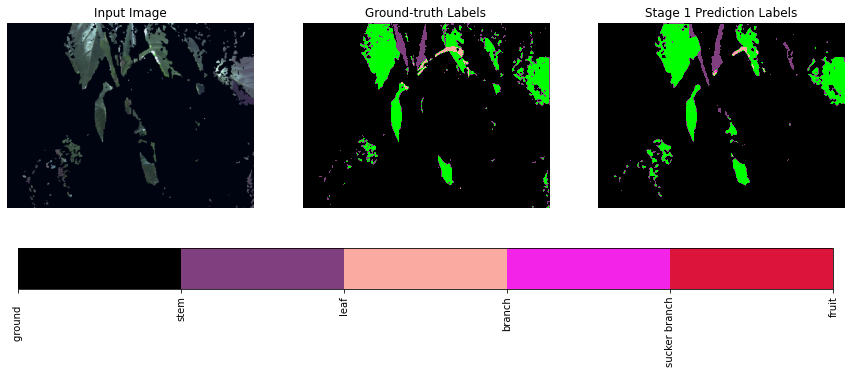

-----> saved best IOU at:  tensor(0.5394, device='cuda:0')
best val iou tensor(0.5394, device='cuda:0')


Train Epoch: [28/30] Loss: 0.0810 mPA: 0.97%  Lr: 0.0002567632    IOU1: 0.5779 :  83%|████████▎ | 434/524 [03:01<00:38,  2.33it/s]

In [ ]:
trainer.train()

In [ ]:
class DLightNe_nodepth(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.s1_xconv1 = ConvBlock(in_channels=in_channels, out_channels=in_channels, stride=1)
        self.s1_dsconv1 = _DSConv(dw_channels=3,out_channels=32,stride=2)
        self.s1_dsconv2 = _DSConv(dw_channels=32,out_channels=64,stride=2)
        self.s1_dwconv3 = _DSConv(dw_channels=64,out_channels=96,stride=1)
        self.s1_dsconv3 = _DSConv(dw_channels=96,out_channels=32,stride=1)
        self.scale_factor = 4
        self.s1_softmax = nn.Softmax(dim=1)
        self.s1_drop_out = nn.Dropout(p=0.1)
        self.s1_conv_final = nn.Conv2d(32, num_classes, kernel_size=1, stride=1, padding=0, bias=True)
        self.conv1_1 = ConvBlock(in_channels=3, out_channels=18, stride=1)
        self.conv1_2 = ConvBlock(in_channels=3, out_channels=14, stride=1)
        self.conv2 = ConvBlock(in_channels=32, out_channels=32, stride=2)
   #     self.dsconv1 = _DSfeature1(dw_channels=32,out_channels=48,stride=2) #ConvBlock(in_channels=32, out_channels=48, stride=2)
        self.dsconv1 = ConvBlock(in_channels=32, out_channels=64, stride=2)
        self.dsconv111 = ConvBlock(in_channels=64, out_channels=64, stride=1)

        self.first_block = nn.Sequential(Bottleneck(64, 64, 2, 6),
                                         Bottleneck(64, 96, 1, 5),
                                         Bottleneck(96, 96, 1, 4))
        self.dsconvb2 = _DSfeature_s1(out_channels=96,dw_channels=128,stride=1)
        self.dSfeature = _DSfeature_s(out_channels=128,dw_channels=256,stride=1)
        self.dSfeature_d = _DSfeature_d(out_channels=256,dw_channels=96,stride=1)

        self.ppm = PPMModule(96, 96)
        self.dsconv2 = _DSConv(dw_channels=96,out_channels=128,stride=1)
        self.conv_high_res = nn.Conv2d(64, 128, kernel_size=1, stride=1, padding=0, bias=True)
        self.dwconv = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)
        self.conv_low_res = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)
        self.relu = nn.ReLU(inplace=True)

        self.classifier = Classifier(num_classes, scale_factor=4)
    def forward(self, input):
        x = self.s1_xconv1(input)
        x = self.s1_dsconv1(x)
        x = self.s1_dsconv2(x)
        x = self.s1_dwconv3(x)
        x = self.s1_dsconv3(x)
        x = self.s1_conv_final(x)
        x_f1 = F.interpolate(input=x, scale_factor=4, mode='bilinear', align_corners=True)
        with torch.no_grad():
          x1 = self.s1_softmax(x_f1).detach()
          input1= remove_easypixel_rgb(x1,input,0.7,0.0 )

#    print('b1')
        xs2_1 =  self.conv1_1(input1)
        xs2_2 =  self.conv1_2(input)
        xs2 = torch.cat((xs2_1,xs2_2),1)
        xs2 =  self.conv2(xs2)
        xs2 =  self.dsconv1(xs2)
        xs21 =  self.dsconv111(xs2)
       # x2 = torch.add(xs11,xs2) #co the doi add
 #       print('b2')
        x2 = self.first_block(xs21)
      #  x2 = self.dsconvb1 (x2)
        x2 = self.dsconvb2 (x2)
        x2 = self.dSfeature (x2)
  #      print('b3')
        x2 = self.dSfeature_d (x2)
        x2 = self.ppm(x2)
        x2 =  self.dsconv2(x2)

        x3 = F.interpolate(input=x2, scale_factor=2, mode='bilinear',
                                     align_corners=True)
        x3 = self.dwconv(x3)
        x3 = self.conv_low_res(x3)
        x = self.conv_high_res(xs2) #co the doi ket noi voi cai dau tien
        x = torch.add(x, x3)
        x = self.relu(x)

        x_f2 = self.classifier(x)

        return x_f2

In [ ]:
model = DLightNe_nodepth(3,numclass)

In [ ]:
trainer = Trainner(model,input_path,batch_size,max_epochs,isdepth=False,num_class = numclass)

3080
3080


Train Epoch: [0/30] Loss: 0.6459 mPA: 0.77%  Lr: 0.0009592708    IOU1: 0.2525 : 100%|██████████| 462/462 [03:09<00:00,  2.44it/s]
Train Epoch: [0/30] Loss: 0.5118 mPA: 0.80%      IOU1: 0.2730 : 100%|██████████| 52/52 [00:09<00:00,  5.70it/s]


idx: 149
Val Loss: 0.5804 FPS: 71.7 IOU: 0.2617


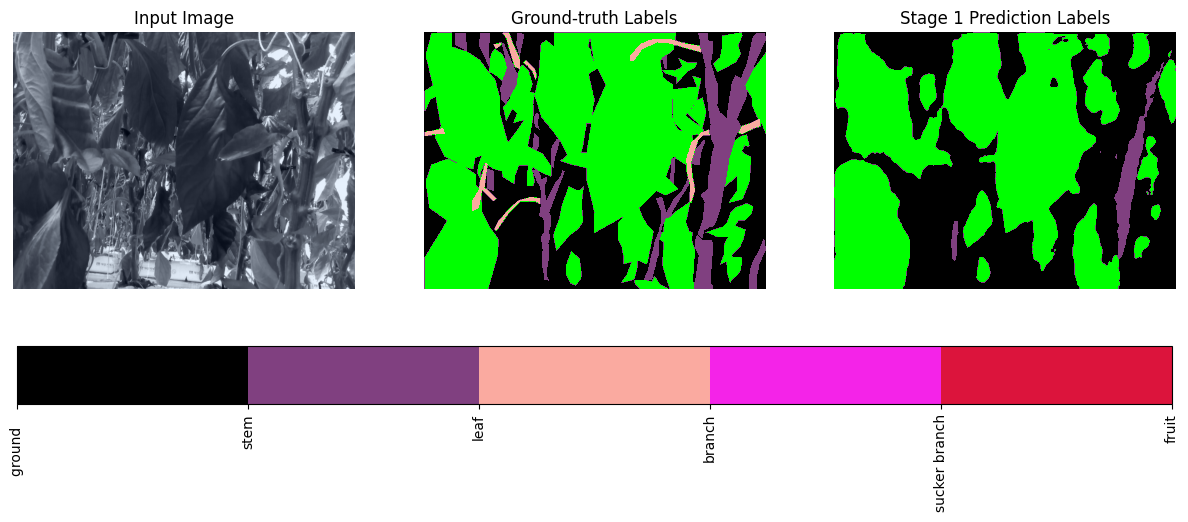

-----> saved best IOU at:  tensor(0.2730, device='cuda:0')
-----> saved best Loss at:  0.5118354355747049
best val iou tensor(0.2730, device='cuda:0')


Train Epoch: [1/30] Loss: 0.4721 mPA: 0.82%  Lr: 0.0009202005    IOU1: 0.3010 : 100%|██████████| 462/462 [03:10<00:00,  2.42it/s]
Train Epoch: [1/30] Loss: 0.4422 mPA: 0.82%      IOU1: 0.3249 : 100%|██████████| 52/52 [00:10<00:00,  4.73it/s]


idx: 39
Val Loss: 0.3201 FPS: 72.0 IOU: 0.3546


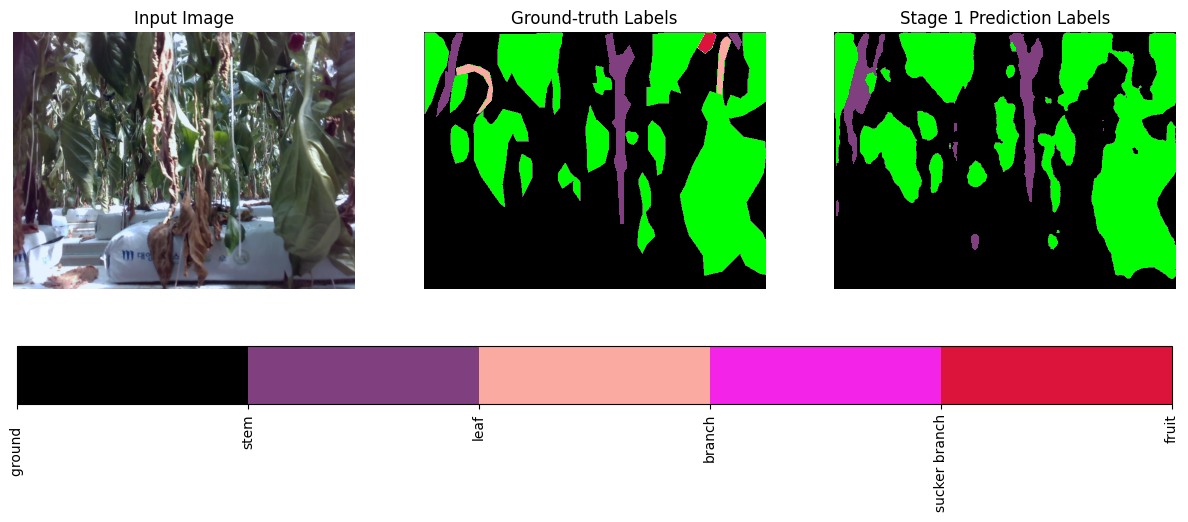

-----> saved best IOU at:  tensor(0.3249, device='cuda:0')
best val iou tensor(0.3249, device='cuda:0')


Train Epoch: [2/30] Loss: 0.4155 mPA: 0.84%  Lr: 0.0008827214    IOU1: 0.3385 : 100%|██████████| 462/462 [03:12<00:00,  2.40it/s]
Train Epoch: [2/30] Loss: 0.4549 mPA: 0.81%      IOU1: 0.3408 : 100%|██████████| 52/52 [00:10<00:00,  5.18it/s]


idx: 153
Val Loss: 0.3773 FPS: 44.1 IOU: 0.3540


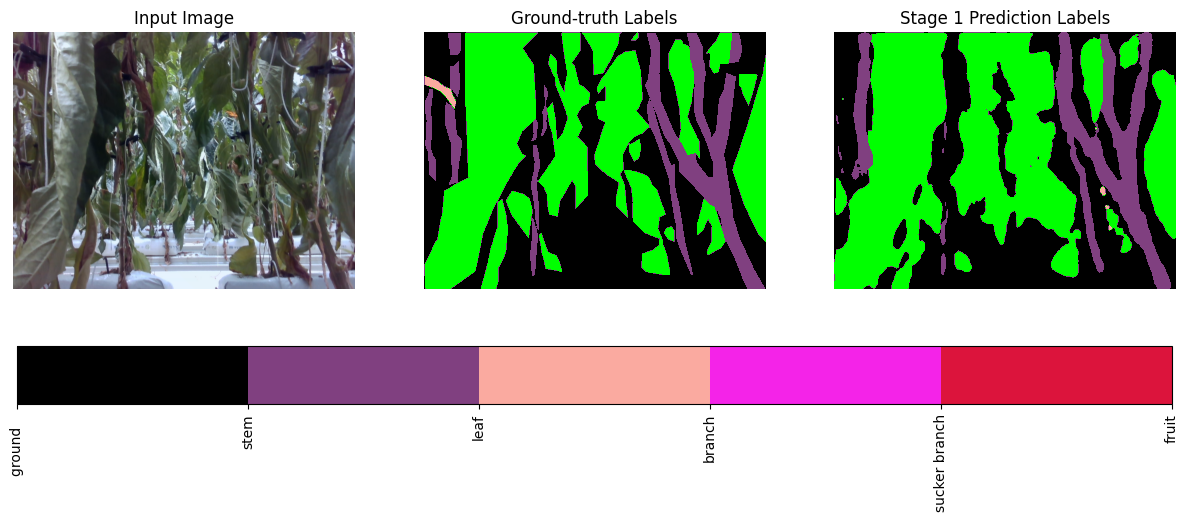

-----> saved best IOU at:  tensor(0.3408, device='cuda:0')
best val iou tensor(0.3408, device='cuda:0')


Train Epoch: [3/30] Loss: 0.3661 mPA: 0.85%  Lr: 0.0008467689    IOU1: 0.3705 : 100%|██████████| 462/462 [03:12<00:00,  2.40it/s]
Train Epoch: [3/30] Loss: 0.3924 mPA: 0.85%      IOU1: 0.3640 : 100%|██████████| 52/52 [00:10<00:00,  5.03it/s]


idx: 157
Val Loss: 0.3524 FPS: 69.3 IOU: 0.4062


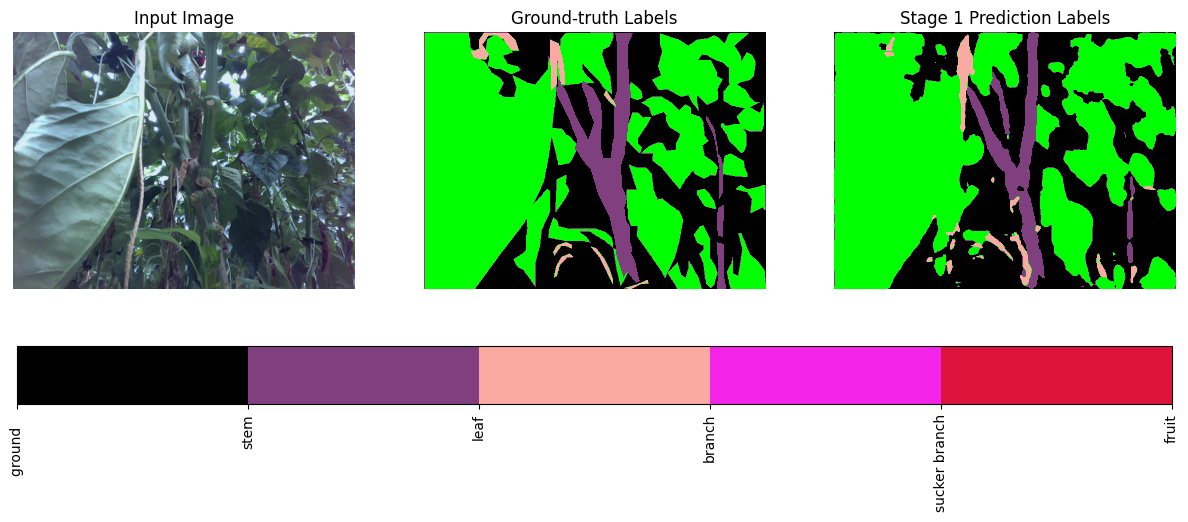

-----> saved best IOU at:  tensor(0.3640, device='cuda:0')
best val iou tensor(0.3640, device='cuda:0')


Train Epoch: [4/30] Loss: 0.3259 mPA: 0.87%  Lr: 0.0008122807    IOU1: 0.3956 : 100%|██████████| 462/462 [03:13<00:00,  2.38it/s]
Train Epoch: [4/30] Loss: 0.3090 mPA: 0.88%      IOU1: 0.4015 : 100%|██████████| 52/52 [00:10<00:00,  5.09it/s]


idx: 212
Val Loss: 0.2088 FPS: 52.2 IOU: 0.4090


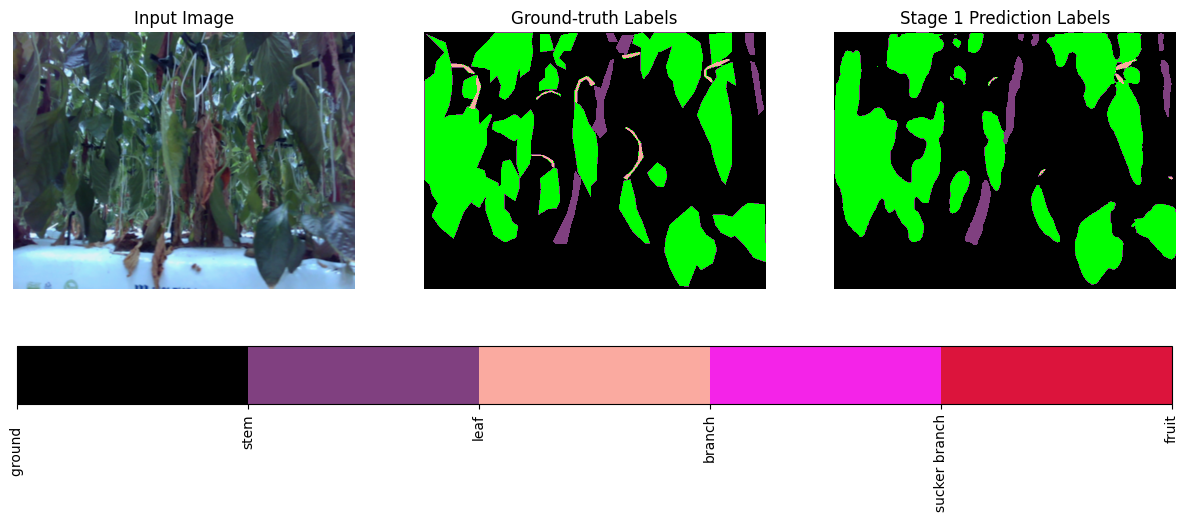

-----> saved best IOU at:  tensor(0.4015, device='cuda:0')
best val iou tensor(0.4015, device='cuda:0')


Train Epoch: [5/30] Loss: 0.2957 mPA: 0.88%  Lr: 0.0007791971    IOU1: 0.4155 : 100%|██████████| 462/462 [03:14<00:00,  2.37it/s]
Train Epoch: [5/30] Loss: 0.2893 mPA: 0.89%      IOU1: 0.4131 : 100%|██████████| 52/52 [00:10<00:00,  4.90it/s]


idx: 10
Val Loss: 0.3162 FPS: 72.6 IOU: 0.2855


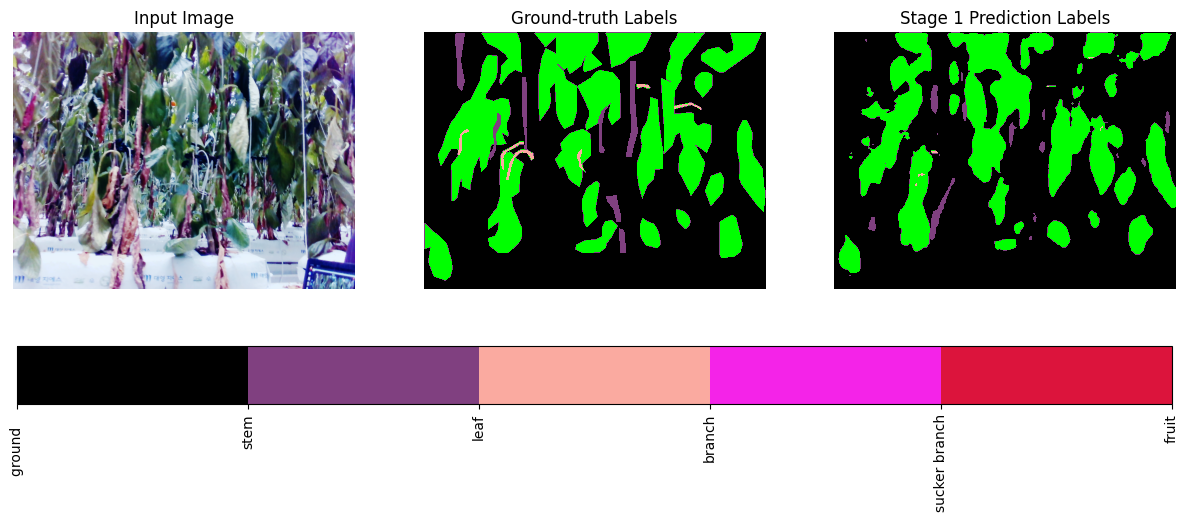

-----> saved best IOU at:  tensor(0.4131, device='cuda:0')
best val iou tensor(0.4131, device='cuda:0')


Train Epoch: [6/30] Loss: 0.2659 mPA: 0.90%  Lr: 0.0007474610    IOU1: 0.4348 : 100%|██████████| 462/462 [03:15<00:00,  2.37it/s]
Train Epoch: [6/30] Loss: 0.2787 mPA: 0.89%      IOU1: 0.4189 : 100%|██████████| 52/52 [00:10<00:00,  4.73it/s]


idx: 127
Val Loss: 0.3662 FPS: 92.8 IOU: 0.3445


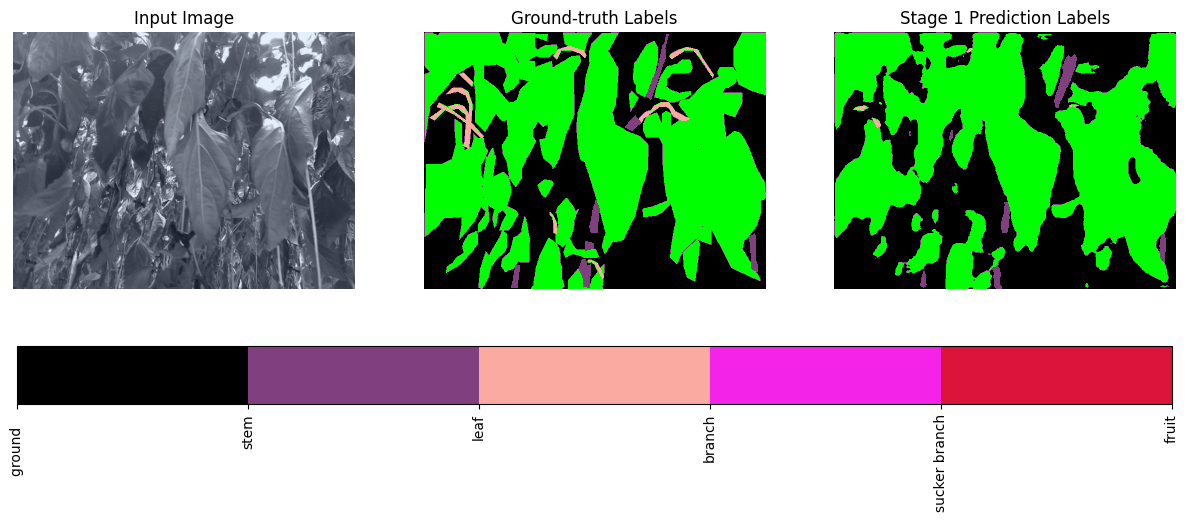

-----> saved best IOU at:  tensor(0.4189, device='cuda:0')
best val iou tensor(0.4189, device='cuda:0')


Train Epoch: [7/30] Loss: 0.2455 mPA: 0.90%  Lr: 0.0007170175    IOU1: 0.4487 : 100%|██████████| 462/462 [03:15<00:00,  2.36it/s]
Train Epoch: [7/30] Loss: 0.2656 mPA: 0.89%      IOU1: 0.4415 : 100%|██████████| 52/52 [00:11<00:00,  4.37it/s]


idx: 307
Val Loss: 0.2158 FPS: 64.2 IOU: 0.4347


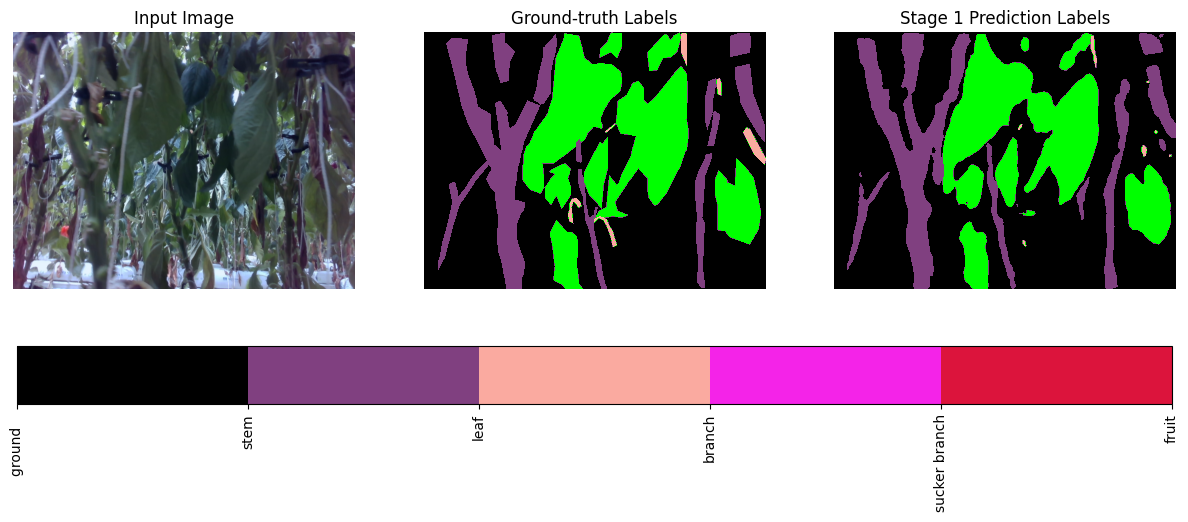

-----> saved best IOU at:  tensor(0.4415, device='cuda:0')
best val iou tensor(0.4415, device='cuda:0')


Train Epoch: [8/30] Loss: 0.2293 mPA: 0.91%  Lr: 0.0006883714    IOU1: 0.4598 :  98%|█████████▊| 453/462 [03:11<00:03,  2.35it/s]

In [ ]:
trainer.train()

In [ ]:
trainer = Trainner(model,input_path,batch_size,max_epochs,isdepth=False,num_class = numclass)

6288
6288


Train Epoch: [0/30] Loss: 0.2097 mPA: 0.92%  Lr: 0.0009185455    IOU1: 0.4710 : 100%|██████████| 944/944 [16:36<00:00,  1.06s/it]
Train Epoch: [0/30] Loss: 0.2287 mPA: 0.91%      IOU1: 0.4682 : 100%|██████████| 105/105 [01:33<00:00,  1.12it/s]


idx: 124
Val Loss: 0.4077 FPS: 52.5 IOU: 0.3924


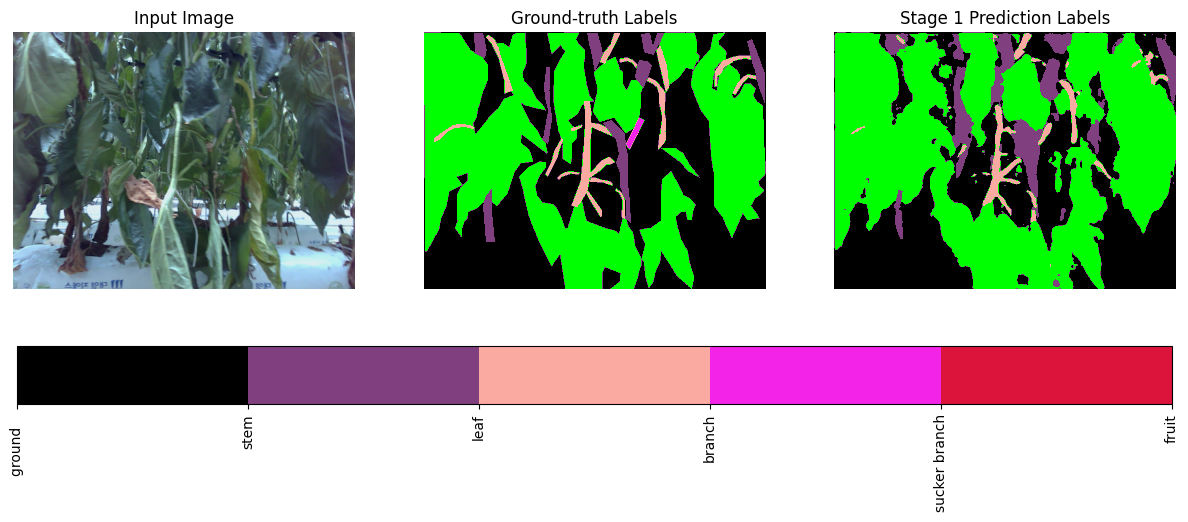

-----> saved best IOU at:  tensor(0.4682, device='cuda:0')
-----> saved best Loss at:  0.22871800084972077
best val iou tensor(0.4682, device='cuda:0')


Train Epoch: [1/30] Loss: 0.1704 mPA: 0.93%  Lr: 0.0008437259    IOU1: 0.4968 : 100%|██████████| 944/944 [06:17<00:00,  2.50it/s]
Train Epoch: [1/30] Loss: 0.1804 mPA: 0.93%      IOU1: 0.4951 : 100%|██████████| 105/105 [00:19<00:00,  5.43it/s]


idx: 268
Val Loss: 0.1797 FPS: 88.7 IOU: 0.5256


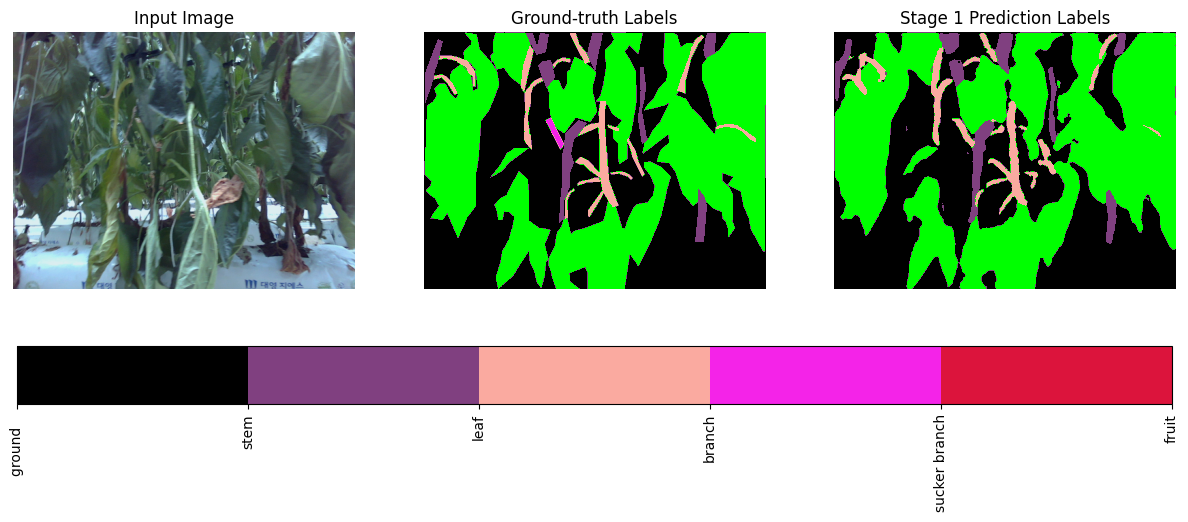

-----> saved best IOU at:  tensor(0.4951, device='cuda:0')
best val iou tensor(0.4951, device='cuda:0')


Train Epoch: [2/30] Loss: 0.1642 mPA: 0.94%  Lr: 0.0007750006    IOU1: 0.5032 : 100%|██████████| 944/944 [06:21<00:00,  2.48it/s]
Train Epoch: [2/30] Loss: 0.1774 mPA: 0.93%      IOU1: 0.4910 : 100%|██████████| 105/105 [00:19<00:00,  5.37it/s]


idx: 139
Val Loss: 0.0732 FPS: 83.9 IOU: 0.3810


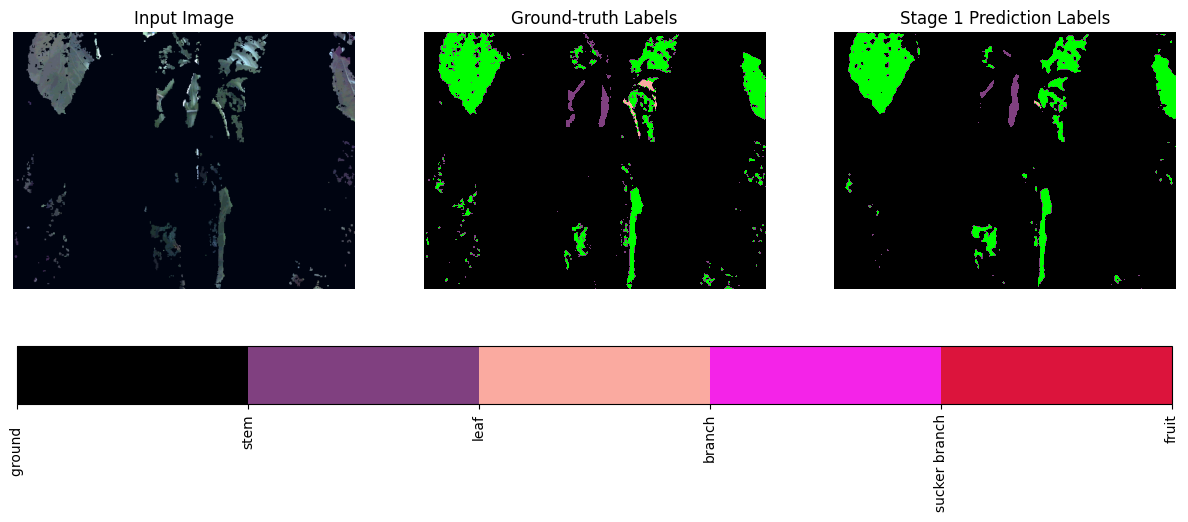

best val iou tensor(0.4951, device='cuda:0')


Train Epoch: [3/30] Loss: 0.1512 mPA: 0.94%  Lr: 0.0007118733    IOU1: 0.5156 : 100%|██████████| 944/944 [06:19<00:00,  2.49it/s]
Train Epoch: [3/30] Loss: 0.1582 mPA: 0.94%      IOU1: 0.5148 : 100%|██████████| 105/105 [00:21<00:00,  4.98it/s]


idx: 449
Val Loss: 0.1648 FPS: 99.5 IOU: 0.5030


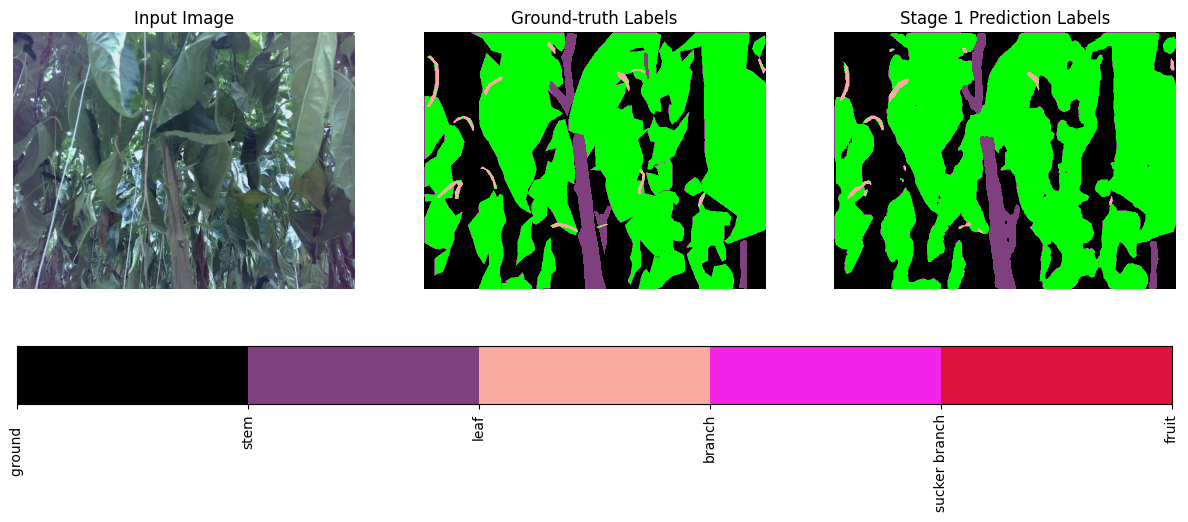

-----> saved best IOU at:  tensor(0.5148, device='cuda:0')
best val iou tensor(0.5148, device='cuda:0')


Train Epoch: [4/30] Loss: 0.1440 mPA: 0.94%  Lr: 0.0006538881    IOU1: 0.5226 : 100%|██████████| 944/944 [06:21<00:00,  2.47it/s]
Train Epoch: [4/30] Loss: 0.1584 mPA: 0.94%      IOU1: 0.5086 : 100%|██████████| 105/105 [00:19<00:00,  5.28it/s]


idx: 339
Val Loss: 0.0958 FPS: 79.2 IOU: 0.5344


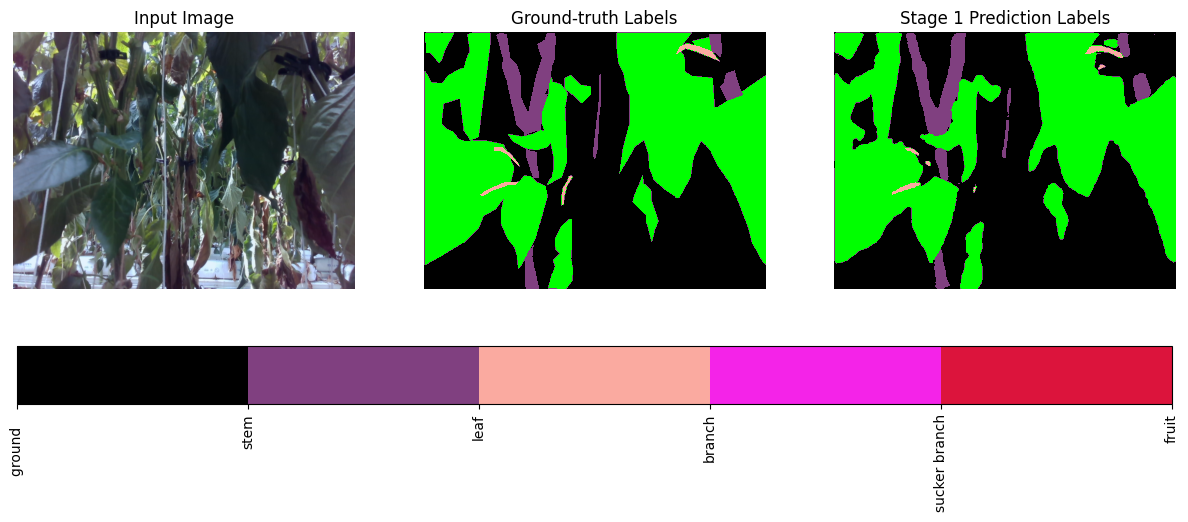

best val iou tensor(0.5148, device='cuda:0')


Train Epoch: [5/30] Loss: 0.1410 mPA: 0.94%  Lr: 0.0006006259    IOU1: 0.5272 : 100%|██████████| 944/944 [06:22<00:00,  2.47it/s]
Train Epoch: [5/30] Loss: 0.1629 mPA: 0.94%      IOU1: 0.5083 : 100%|██████████| 105/105 [00:20<00:00,  5.04it/s]


idx: 247
Val Loss: 0.1009 FPS: 96.2 IOU: 0.4968


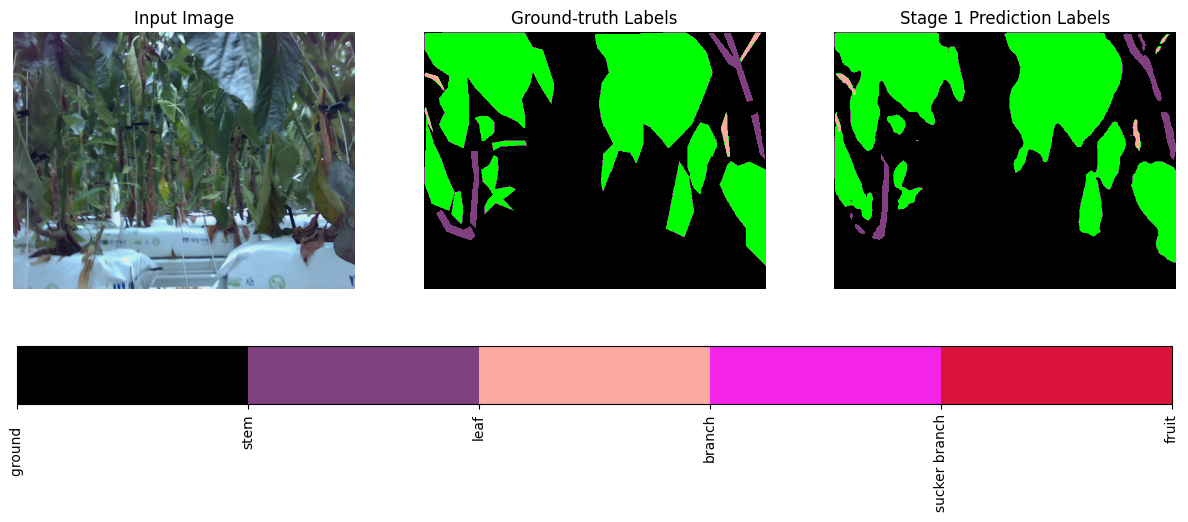

best val iou tensor(0.5148, device='cuda:0')


Train Epoch: [6/30] Loss: 0.1336 mPA: 0.95%  Lr: 0.0005517023    IOU1: 0.5342 : 100%|██████████| 944/944 [06:25<00:00,  2.45it/s]
Train Epoch: [6/30] Loss: 0.1502 mPA: 0.94%      IOU1: 0.5257 : 100%|██████████| 105/105 [00:22<00:00,  4.76it/s]


idx: 195
Val Loss: 0.1423 FPS: 73.9 IOU: 0.4738


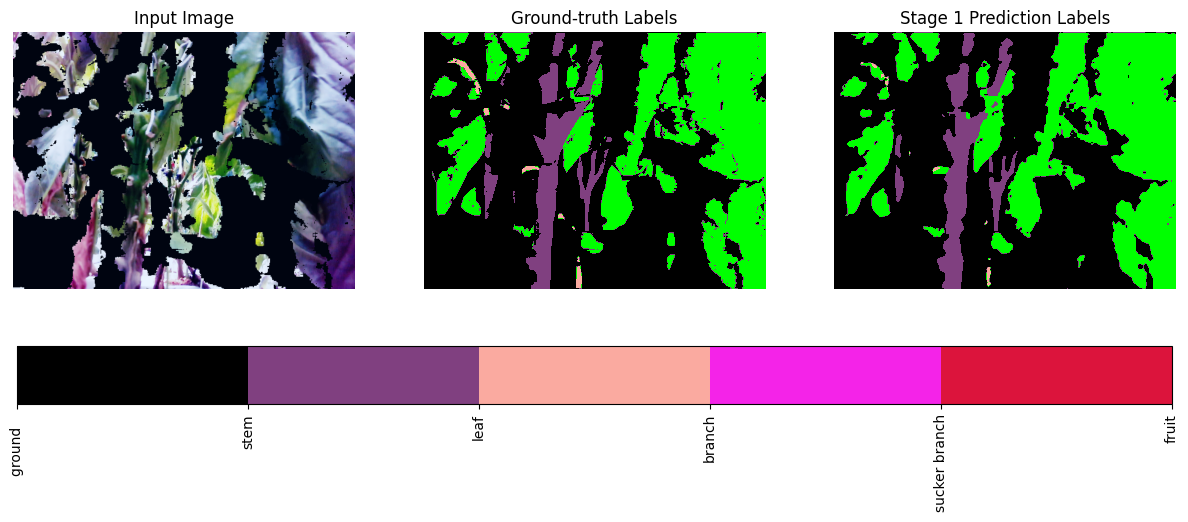

-----> saved best IOU at:  tensor(0.5257, device='cuda:0')
best val iou tensor(0.5257, device='cuda:0')


Train Epoch: [7/30] Loss: 0.1293 mPA: 0.95%  Lr: 0.0005226521    IOU1: 0.5368 :  64%|██████▎   | 601/944 [04:04<02:16,  2.51it/s]

In [ ]:
trainer.train()

In [ ]:
# filename = '/content/drive/MyDrive/deeplabv3/augment/weights/1way_nocut_1_best_iou.pth' #remember change the path #Val Loss: 2.4747  IOU: 0.2043
filename = '/content/drive/MyDrive/deeplabv3/augment/weights/1way_cut_2_best_iou.pth' #Loss: 0.0718  IOU: 0.5543
# filename = '/content/drive/MyDrive/deeplabv3/augment/weights/2way_best_iou.pth' #Val Loss: 0.0697  IOU: 0.5613
save_path = os.path.join(input_path, filename)
if os.path.isfile(save_path):
    name, ext = os.path.splitext(save_path)
    assert ext == '.pkl' or '.pth', 'Sorry only .pth and .pkl files supported.'
    print('Resuming training, loading {}...'.format(save_path))
    print(model.load_state_dict(torch.load(save_path, map_location=lambda storage, loc: storage))   )

Resuming training, loading /content/drive/MyDrive/deeplabv3/augment/weights/1way_cut_2_best_iou.pth...
<All keys matched successfully>


Val Loss: 1.5253  IOU: 0.2989


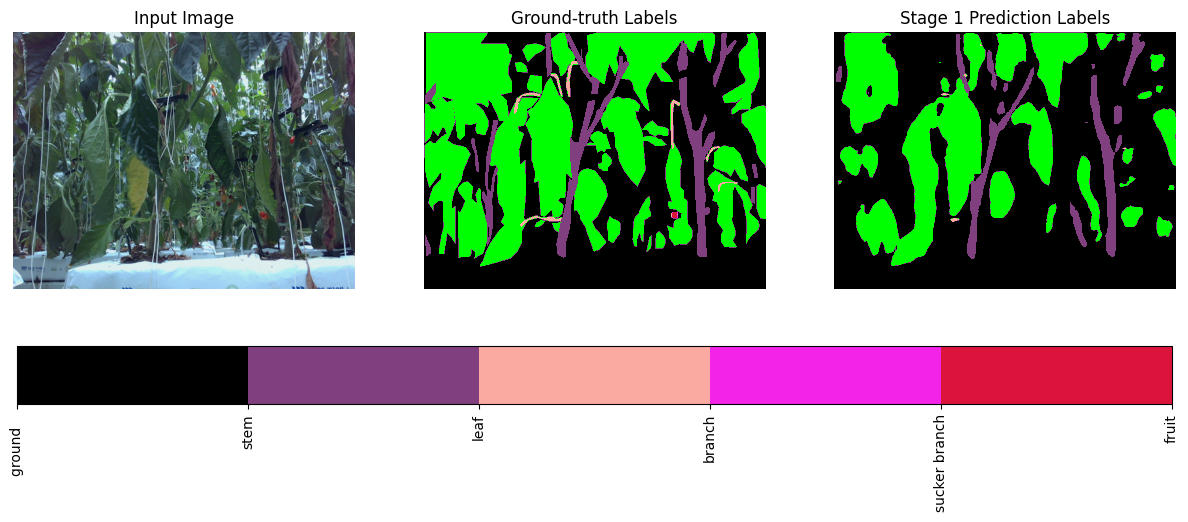

In [ ]:
# image_path = "/content/drive/MyDrive/deeplabv3/rgb/_1676614107418.png"   0.5797
# mask_path = "/content/drive/MyDrive/deeplabv3/mask/_1676614107418.png"  Val Loss: 0.9491  IOU: 0.2408
# depth_path = "/content/drive/MyDrive/deeplabv3/depth/_1676614107418.png" 0.5681
# image_path = "/content/drive/MyDrive/deeplabv3/rgb/_1676614073377.png"
# mask_path = "/content/drive/MyDrive/deeplabv3/mask/_1676614073377.png"
# depth_path = "/content/drive/MyDrive/deeplabv3/depth/_1676614073377.png"
# image_path = "/content/drive/MyDrive/deeplabv3/rgb/1676610004276.png"
# mask_path = "/content/drive/MyDrive/deeplabv3/mask/1676610004276.png"
# depth_path = "/content/drive/MyDrive/deeplabv3/depth/1676610004276.png"
image_path = "/content/drive/MyDrive/deeplabv3/test/rgb/1676614162538.png"
mask_path = "/content/drive/MyDrive/deeplabv3/test/mask/1676614162538.png"
depth_path = "/content/drive/MyDrive/deeplabv3/test/depth/1676614162538.png"


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
data_transforms = transforms.Compose([
      # trans_aug,
      transforms.ToTensor(),
      normalize
  ])
num_class = 6
rgb = cv2.imread(image_path, cv2.IMREAD_COLOR)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(rgb.astype('uint8'), 'RGB')
label = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
depth = cv2.imread(depth_path, cv2.IMREAD_ANYDEPTH)

image = data_transforms(pil_image)
re = depth.reshape(480,640,1)
re = re  *0.001
re = torch.FloatTensor(re)
# print(re.shape)
re = torch.transpose(re, 0, 2)
re = torch.transpose(re, 1, 2)
label = convert_to_relevant_labels(label)
label = np.asarray(label, np.compat.long)
label = torch.LongTensor(label)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image =image.unsqueeze(0).to( device)
fps = 0
mask = label.unsqueeze(0).to( device)
depth = re.unsqueeze(0).to( device)
#  print(image.shape)
#  print(mask.shape)
#  print(depth.shape)
model.eval()
loss_criterion = nn.CrossEntropyLoss(ignore_index=255)
fiou = JaccardIndex(num_classes= num_class,task="multiclass").to( device)
info = True
isdepth = False
with torch.no_grad():
    if info == True:
          start_time = time.time()
    if isdepth == False:
          outputs = model(image)
    else:
          # depth = depth.unsqueeze(0).to( self.device)
          outputs = model(image,depth)

loss =  loss_criterion(outputs, mask)
iou_s =  fiou(outputs, mask)
print('{} Loss: {:.4f}  IOU: {:.4f}'.format('Val',  loss.item(),iou_s))


pred = torch.argmax(outputs, 1)
label = mask
pred = pred.squeeze(0).cpu().data.numpy()
label = mask.cpu().numpy()
label = label.transpose(1, 2, 0)
label = label.reshape( 480, 640,1)
img = image.squeeze(0)
img = img.cpu().numpy()
img = img.transpose(1, 2, 0)
if img.shape[2] > 3:
  img = img[:,:,0:3]
r,g,b = cv2.split(img)
img_bgr = cv2.merge([b,g,r])
#im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display([img[:,:,0:3], label, pred.reshape( 480, 640,1)])


Val Loss: 0.1784  IOU: 0.4488


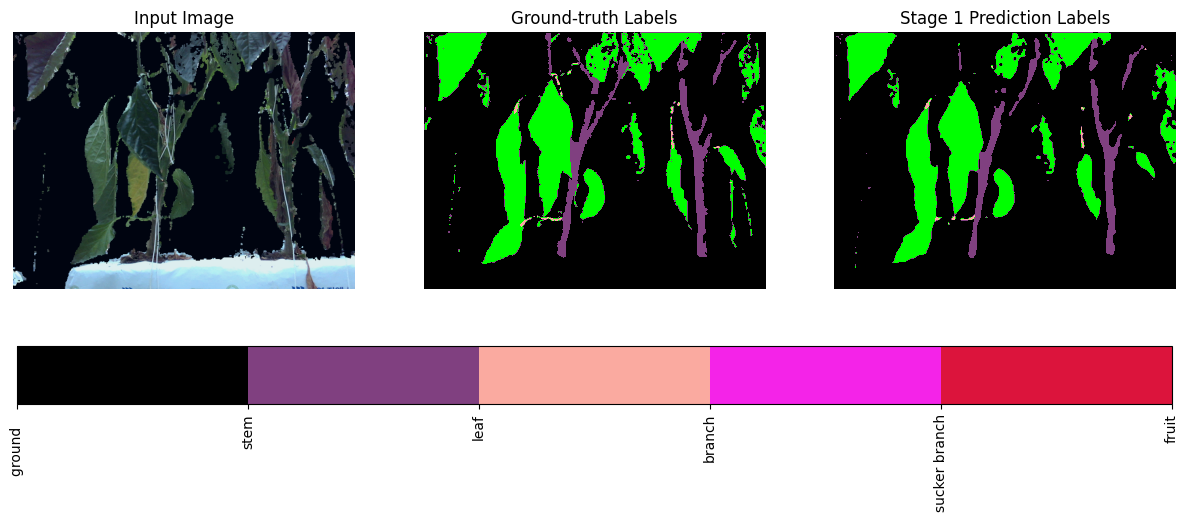

In [ ]:
# image_path = "/content/drive/MyDrive/deeplabv3/rgb/_1676614107418.png"   0.5797
# mask_path = "/content/drive/MyDrive/deeplabv3/mask/_1676614107418.png"  Val Loss: 0.9491  IOU: 0.2408
# depth_path = "/content/drive/MyDrive/deeplabv3/depth/_1676614107418.png" 0.5681
# image_path = "/content/drive/MyDrive/deeplabv3/rgb/_1676614073377.png"
# mask_path = "/content/drive/MyDrive/deeplabv3/mask/_1676614073377.png"
# depth_path = "/content/drive/MyDrive/deeplabv3/depth/_1676614073377.png"
# image_path = "/content/drive/MyDrive/deeplabv3/rgb/1676609412282.png"
# mask_path = "/content/drive/MyDrive/deeplabv3/mask/1676609412282.png"
# depth_path = "/content/drive/MyDrive/deeplabv3/depth/1676609412282.png"
# image_path = "/content/drive/MyDrive/deeplabv3/test/rgb/_1676609412282.png"
# mask_path = "/content/drive/MyDrive/deeplabv3/test/mask/_1676609412282.png"
# depth_path = "/content/drive/MyDrive/deeplabv3/test/depth/1676609412282.png"
image_path = "/content/drive/MyDrive/deeplabv3/test/rgb/_1676614162538.png"
mask_path = "/content/drive/MyDrive/deeplabv3/test/mask/_1676614162538.png"
depth_path = "/content/drive/MyDrive/deeplabv3/test/depth/_1676614162538.png"
# image_path = "/content/drive/MyDrive/deeplabv3/rgb/_1676610004276.png"
# mask_path = "/content/drive/MyDrive/deeplabv3/mask/_1676610004276.png"
# depth_path = "/content/drive/MyDrive/deeplabv3/depth/_1676610004276.png"
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
data_transforms = transforms.Compose([
      # trans_aug,
      transforms.ToTensor(),
      normalize
  ])
num_class = 6
rgb = cv2.imread(image_path, cv2.IMREAD_COLOR)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(rgb.astype('uint8'), 'RGB')
label = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
depth = cv2.imread(depth_path, cv2.IMREAD_ANYDEPTH)

image = data_transforms(pil_image)
re = depth.reshape(480,640,1)
re = re  *0.001
re = torch.FloatTensor(re)
# print(re.shape)
re = torch.transpose(re, 0, 2)
re = torch.transpose(re, 1, 2)
label = convert_to_relevant_labels(label)
label = np.asarray(label, np.compat.long)
label = torch.LongTensor(label)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image =image.unsqueeze(0).to( device)
fps = 0
mask = label.unsqueeze(0).to( device)
depth = re.unsqueeze(0).to( device)
#  print(image.shape)
#  print(mask.shape)
#  print(depth.shape)
model.eval()
loss_criterion = nn.CrossEntropyLoss(ignore_index=255)
fiou = JaccardIndex(num_classes= num_class,task="multiclass").to( device)
info = True
isdepth = False
with torch.no_grad():
    if info == True:
          start_time = time.time()
    if isdepth == False:
          outputs = model(image)
    else:
          # depth = depth.unsqueeze(0).to( self.device)
          outputs = model(image,depth)

loss =  loss_criterion(outputs, mask)
iou_s =  fiou(outputs, mask)
print('{} Loss: {:.4f}  IOU: {:.4f}'.format('Val',  loss.item(),iou_s))


pred = torch.argmax(outputs, 1)
label = mask
pred = pred.squeeze(0).cpu().data.numpy()
label = mask.cpu().numpy()
label = label.transpose(1, 2, 0)
label = label.reshape( 480, 640,1)
img = image.squeeze(0)
img = img.cpu().numpy()
img = img.transpose(1, 2, 0)
if img.shape[2] > 3:
  img = img[:,:,0:3]
r,g,b = cv2.split(img)
img_bgr = cv2.merge([b,g,r])
#im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display([img[:,:,0:3], label, pred.reshape( 480, 640,1)])
